## Bayesian CNN - Galaxy Kinematic Data

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from astropy.io import fits
from astropy.table import Table
from matplotlib.backends.backend_pdf import PdfPages
import os

%matplotlib inline
np.random.seed(10171927)
tf.random.set_seed(10171927)

print('TensorFlow version', tf.__version__)
print('TensorFlow Probability version:', tfp.__version__)

path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'


TensorFlow version 2.6.0
TensorFlow Probability version: 0.14.1


## Load the Data

In [ ]:


X_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/veltrain_2809.npy')
X_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sigtrain_2809.npy')

X_vel_sigscale =  np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_sigscale_train1909.npy')

# X_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_human_190721.npy')
# X_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_human_190721.npy')
Y = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/label_human_060621.npy')
Z = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/catid_ext_human_060621.npy')

# stack the velocity and sigma maps 

X_total = np.concatenate((X_vel, X_sig, X_vel_sigscale), axis = 3)
# X_total = np.concatenate((X_vel, X_sig), axis = 3)

# turn the data into binary labels, 0 for NORs, 1 for ORs
Y = np.where(Y > 1, 1, 0)

class_names = ['Non Obvious Rotator', "Obvious Rotator"]

# Voronoi Maps

In [3]:
X_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_voranoid_210721.npy')
X_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_voranoid_210721.npy')
Y_vor = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/label_voranoid_210721.npy')
Z_vor = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/catid_ext_voranoid_210721.npy')

# X_total = X_vel
# stack the velocity and sigma maps 

X_total = np.concatenate((X_vel, X_sig), axis = 3)

# turn the data into binary labels, 0 for NORs, 1 for ORs
Y_vor = np.where(Y_vor > 1, 1, 0)

class_names = ['Non Obvious Rotator', "Obvious Rotator"]

# Unlabelled data / not in training set

In [ ]:

unlabelled_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_notrain_280921.npy')
unlabelled_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_notrain_280921.npy')

unlabelled_velscaled = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_sigscale_notrain2809.npy')
unlabelled_catids = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/catid_ext_notrain_280921.npy')
# unlabelled_label = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/label_notrain_060621.npy')

X_unlabelled = np.concatenate((unlabelled_vel, unlabelled_sig, unlabelled_velscaled), axis = 3)
Z_unlabelled = unlabelled_catids

## Visualize the Labelled Data

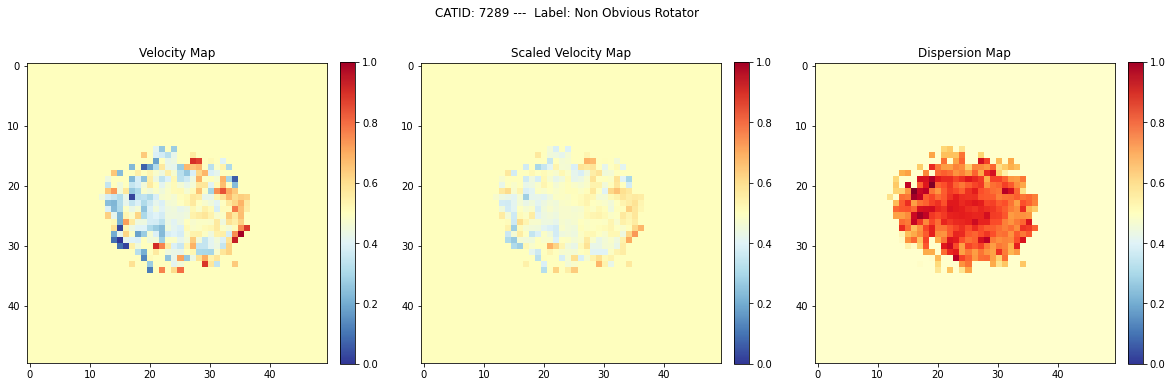

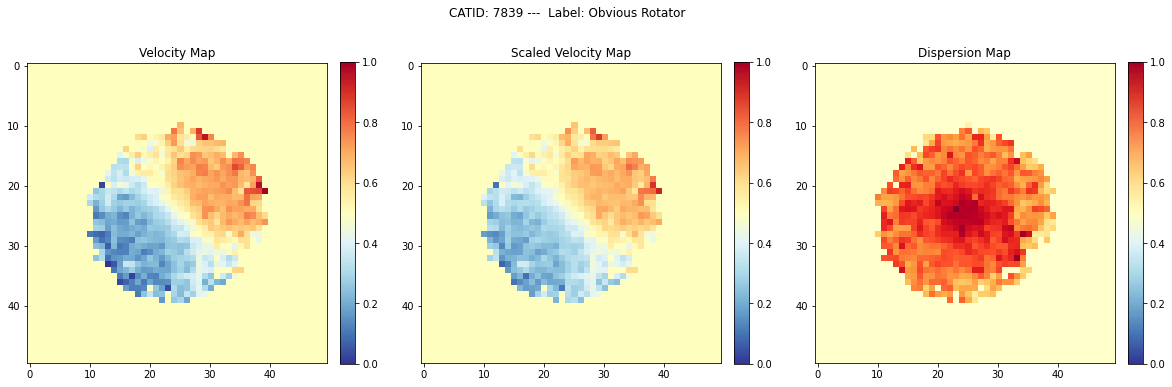

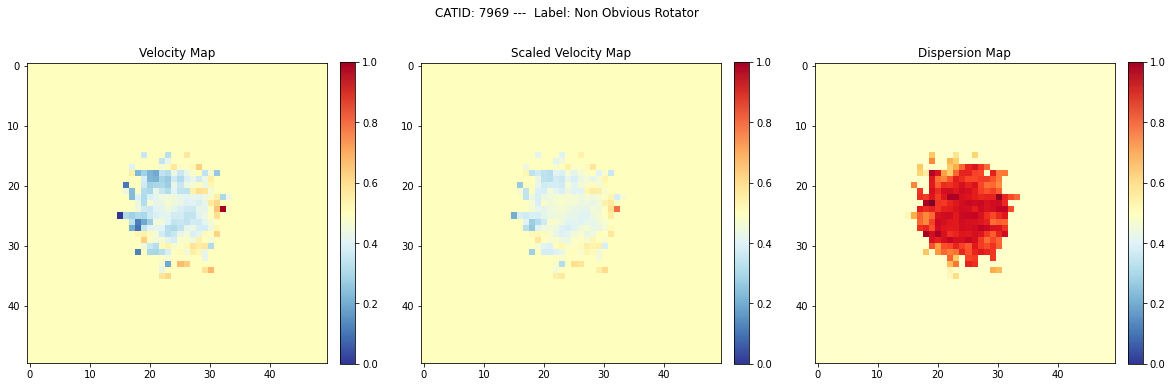

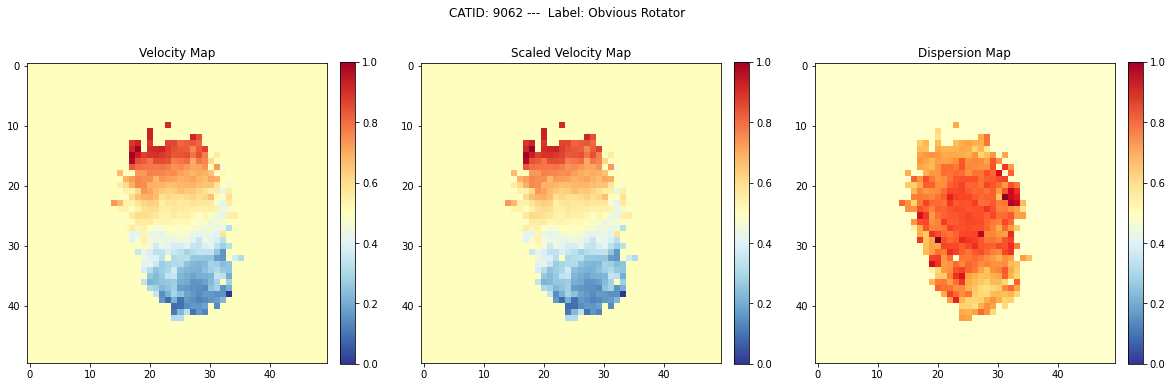

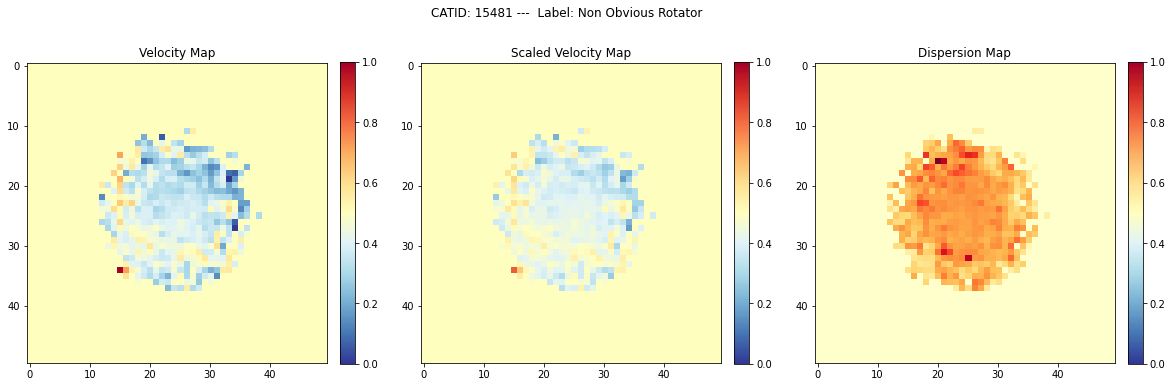

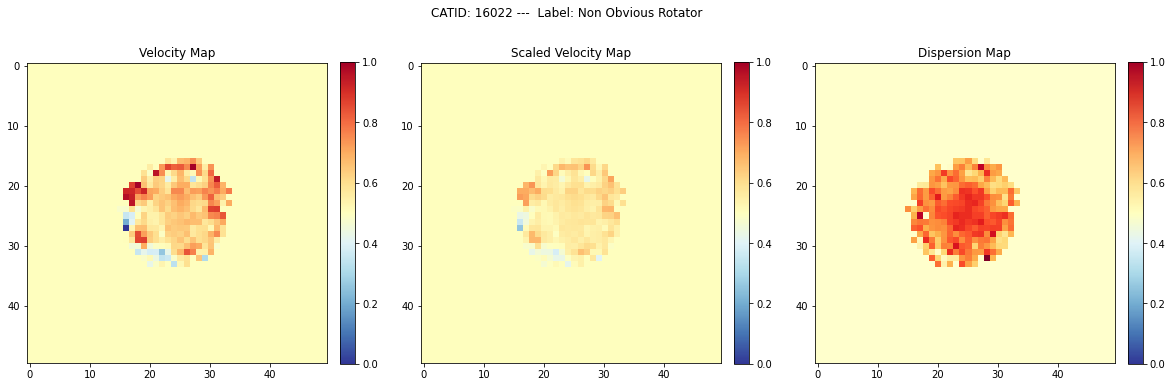

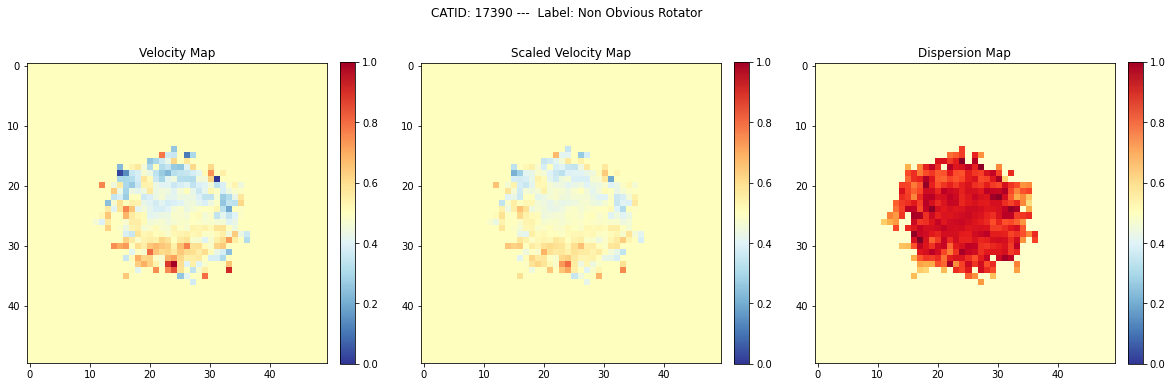

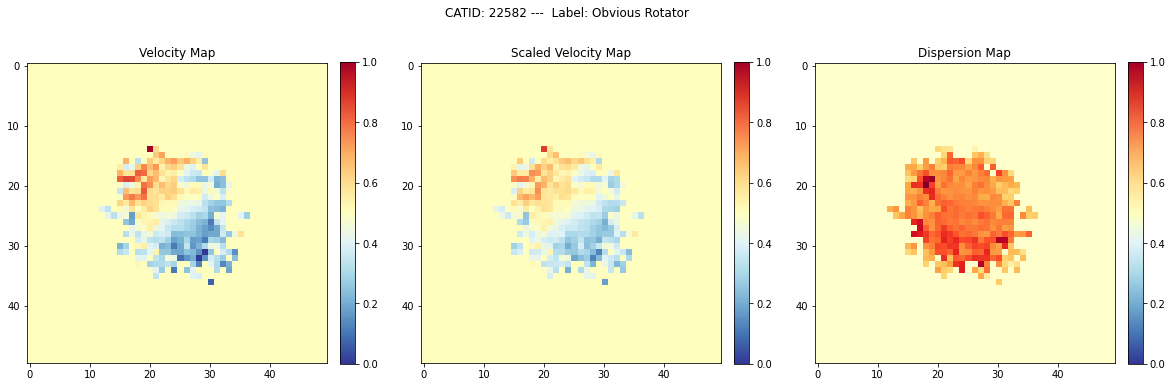

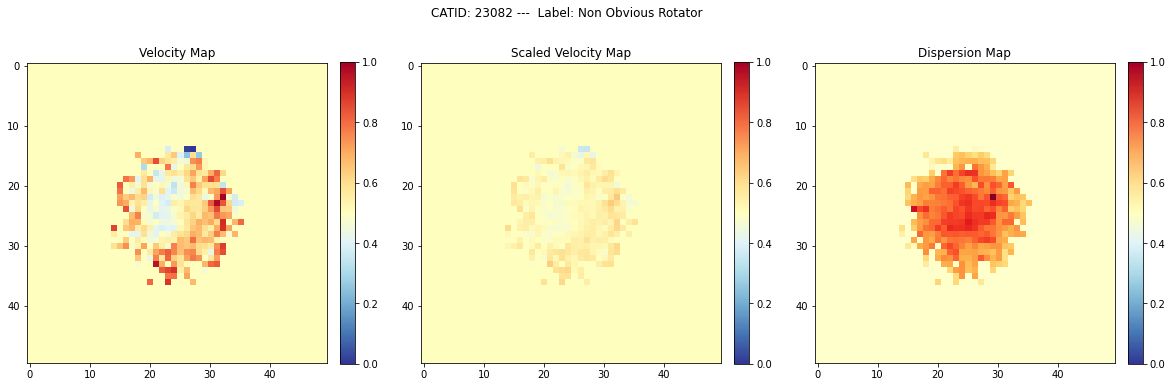

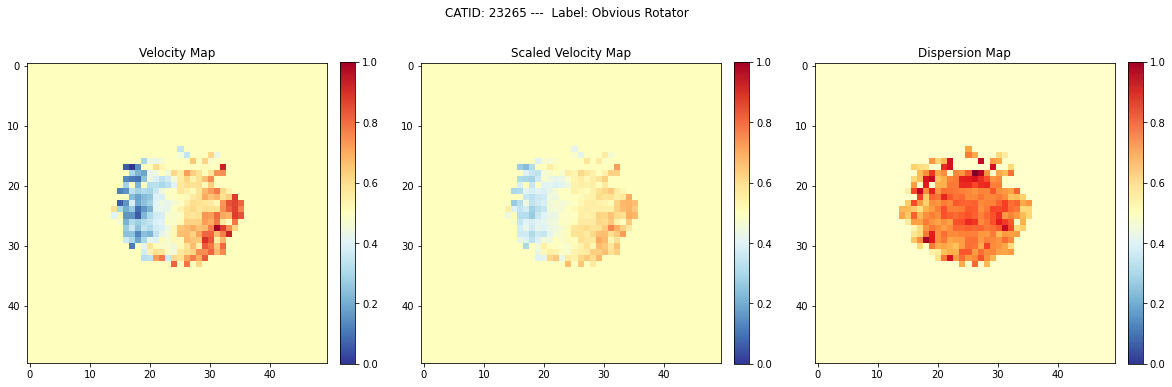

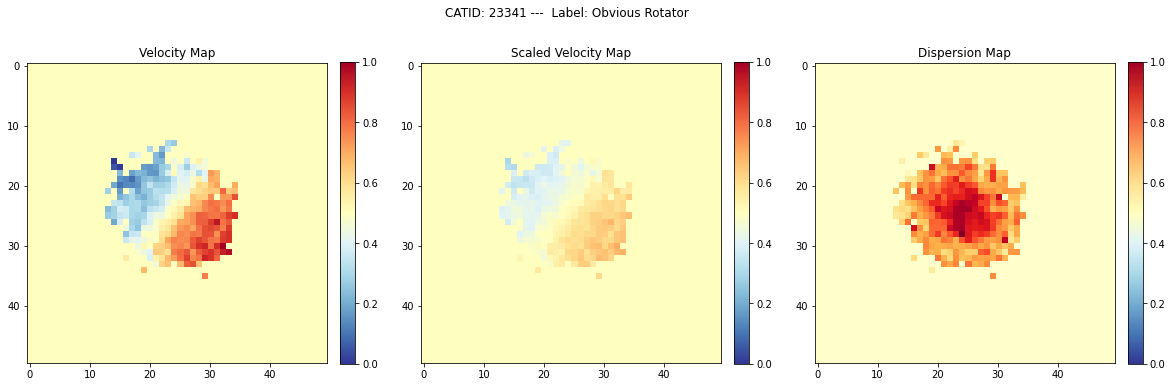

In [ ]:
wrongs = [     15481,      32196,      54270,     177969,     228105,
           230455,     373168,     383147,     506119,     599834,
       9011900001, 9011900547, 9388000068, 9403800117]

## First 5 data points
for i in range(0,np.size(wrongs)):
  val = wrongs[i]
  idx = np.where(Z == val)
  if np.size(idx) > 0:
    idx = idx[0][0]
  else:
    continue

  label = Y[i]
  catid = Z[i]

  if label == 0:
    label = class_names[0]
  else:
    label = class_names[1]

  # print("True label of the test sample {}: {}".format(i, np.argmax(Y[i], axis=-1)))
  fig, axs = plt.subplots(1, 3, figsize = (20, 6))
  fig.suptitle('CATID: ' + str(catid)+ ' ---  ' + 'Label: ' + label)

  a = axs[0].imshow(X_total[i, :, :, 0], cmap='RdYlBu_r', vmax = 1, vmin = 0)
  axs[0].set_title('Velocity Map')
  fig.colorbar(a, ax=axs[0], fraction=0.046, pad=0.04)

  c = axs[1].imshow(X_total[i, :, :, 2], cmap='RdYlBu_r', vmax = 1, vmin = 0)
  axs[1].set_title('Scaled Velocity Map')
  fig.colorbar(c, ax=axs[1], fraction=0.046, pad=0.04)

  b = axs[2].imshow(X_total[i, :, :, 1], cmap='YlOrRd')
  axs[2].set_title('Dispersion Map')
  fig.colorbar(c, ax=axs[2], fraction=0.046, pad=0.04)
  plt.show()


# Visualize Unlabelled Data

70


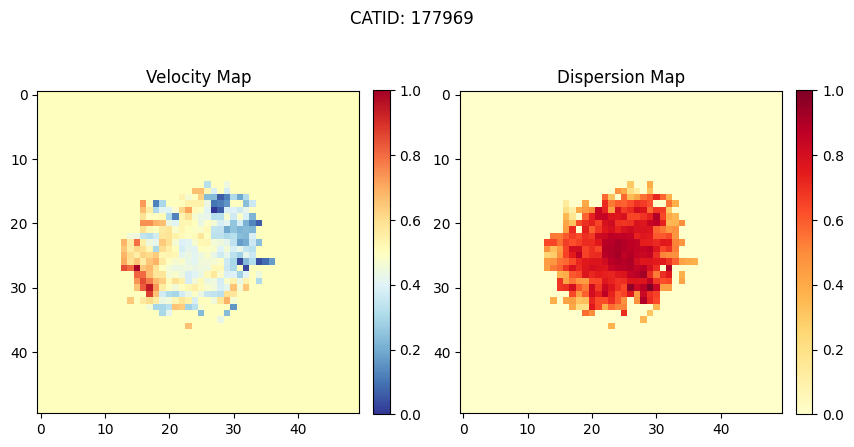

17


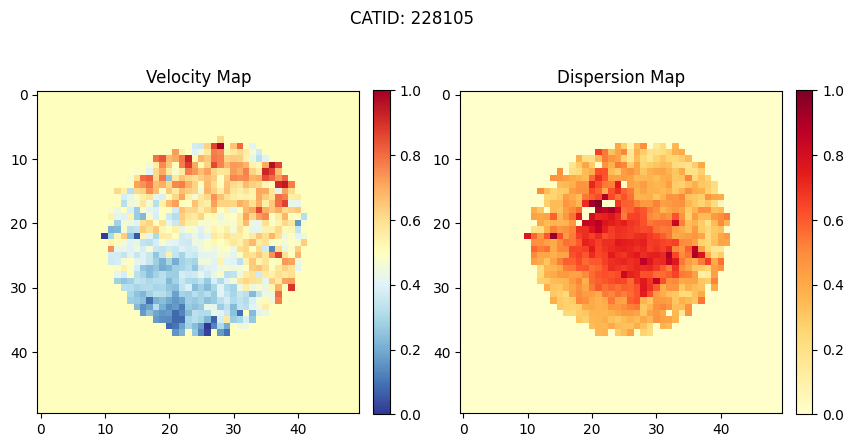

106


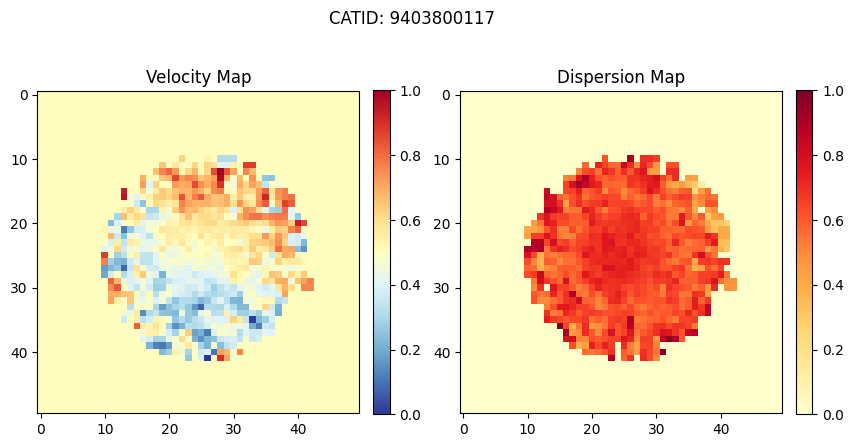

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

wrongs = [     15481,      32196,      54270,     177969,     228105,
           230455,     373168,     383147,     506119,     599834,
       9011900001, 9011900547, 9388000068, 9403800117]

## First 5 data points
for i in range(0,np.size(wrongs)):
  val = wrongs[i]
  idx = np.where(Z_unlabelled == val)
  if np.size(idx) > 0:
    idx = idx[0][0]
  else:
    continue
  print(idx)
  # label = Y[i]
  catid = Z_unlabelled[idx]

  # if label == 0:
  #   label = class_names[0]
  # else:
  #   label = class_names[1]

  # print("True label of the test sample {}: {}".format(idx, np.argmax(Y[idx], axis=-1)))
  fig, axs = plt.subplots(1, 2, figsize = (10, 5))
  fig.suptitle('CATID: ' + str(catid))

  a = axs[0].imshow(X_unlabelled[idx, :, :, 0], cmap='RdYlBu_r', vmax = 1, vmin = 0)
  axs[0].set_title('Velocity Map')
  fig.colorbar(a, ax=axs[0], fraction=0.046, pad=0.04)

  b = axs[1].imshow(X_unlabelled[idx, :, :, 1], cmap='YlOrRd')
  axs[1].set_title('Dispersion Map')
  fig.colorbar(b, ax=axs[1], fraction=0.046, pad=0.04)
  plt.show()

  b = axs[1].imshow(X_unlabelled[idx, :, :, 1], cmap='YlOrRd')
  axs[1].set_title('Dispersion Map')
  fig.colorbar(b, ax=axs[1], fraction=0.046, pad=0.04)
  plt.show()


# Visualize the Voranoi maps

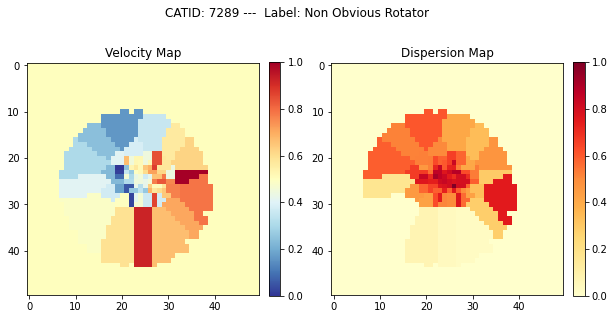

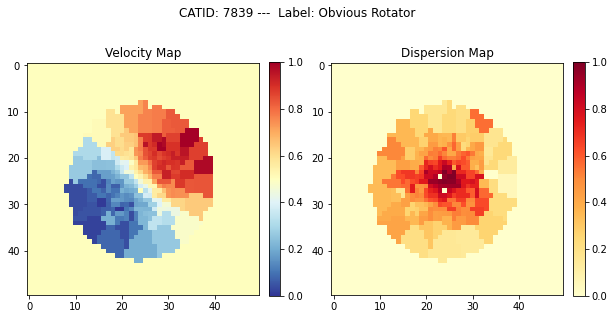

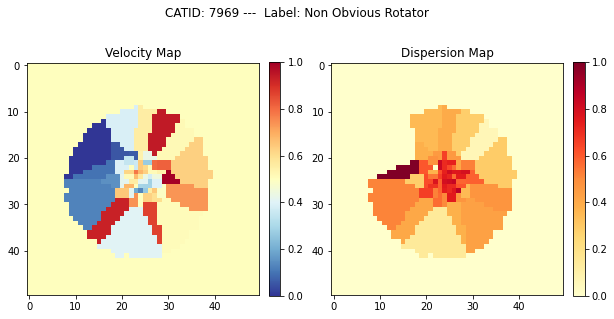

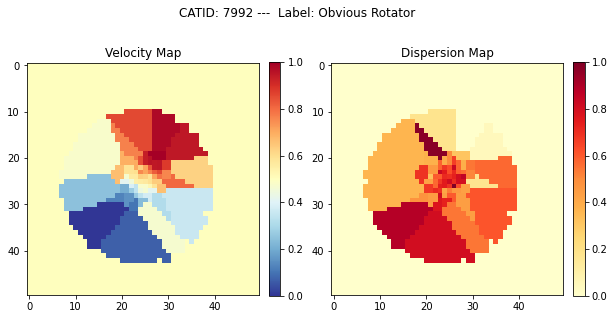

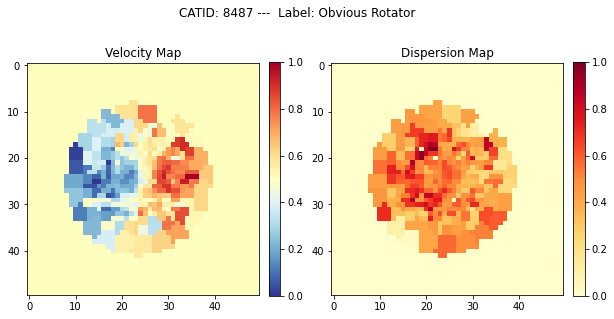

In [ ]:
## First 5 data points
for i in range(0,5):
  idx = i
  label = Y_vor[i]
  catid = Z_vor[i]

  if label == 0:
    label = class_names[0]
  else:
    label = class_names[1]

  # print("True label of the test sample {}: {}".format(idx, np.argmax(Y[idx], axis=-1)))
  fig, axs = plt.subplots(1, 2, figsize = (10, 5))
  fig.suptitle('CATID: ' + str(catid)+ ' ---  ' + 'Label: ' + label)

  a = axs[0].imshow(X_total[idx, :, :, 0], cmap='RdYlBu_r', vmax = 1, vmin = 0)
  axs[0].set_title('Velocity Map')
  fig.colorbar(a, ax=axs[0], fraction=0.046, pad=0.04)

  b = axs[1].imshow(X_total[idx, :, :, 1], cmap='YlOrRd')
  axs[1].set_title('Dispersion Map')
  fig.colorbar(b, ax=axs[1], fraction=0.046, pad=0.04)
  plt.show()

# TRAINING VS TESTING

In [4]:
# Include Sig maps or not

# X_use = X_vel
X_use = X_total

In [ ]:
np.shape(X_use)

(1098, 50, 50, 2)

# Visualize the Distribution

In [5]:
Y = Y_vor
Z = Z_vor

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


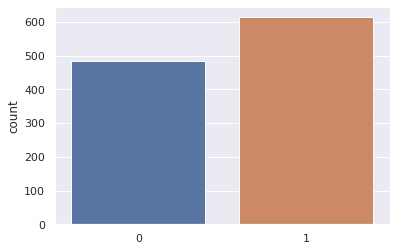

In [ ]:
sns.set_theme()
f = sns.countplot(Y)
# f.ticks

# need to fix this by adding one rotation for ORs

In [ ]:
val, counts = np.unique(Y, return_counts=True)
print(val, counts)

[0 1] [524 718]


In [ ]:
np.random.shuffle(ors)

In [ ]:
ors = np.array(ors[0])

In [ ]:
nors = np.array(nors)

In [ ]:
nors =  np.array(nors[0])

In [ ]:
# a = int(np.size(nors)/5)+1
# b = int(np.size(ors)/5)+1

# group_1 = np.hstack((ors[0:b], nors[0:a])) 
# group_2 = np.hstack((ors[b:2*b], nors[a:2*a])) 
# group_3 = np.hstack((ors[2*b:3*b], nors[2*a:3*a])) 
# group_4 = np.hstack((ors[3*b:4*b], nors[3*a:4*a])) 
# group_5 = np.hstack((ors[4*b:], nors[4*a:])) 

In [ ]:
# nors = np.where(Y == 0)
# ors = np.where(Y == 1)

# group_1 = []
# group_2 = []
# group_3 = []
# group_4 = []
# group_5 = []
# numbers_chosen = []
# size = np.size(Z)
# size_ors = np.size(ors)
# size_nors = np.size(nors)
# group_size = size/5

# while np.size(numbers_chosen) < size:
#   if np.random.rand() < 0.6:
#     r = 
  
#   r = np.round(np.random.uniform(low = 0 , high = size-1))
#   r = int(r)
#   if r in numbers_chosen:
#     continue
#   else:
#     numbers_chosen.append(r)
#     if np.size(group_1) < group_size:
#       group_1.append(r)
#     elif np.size(group_2) < group_size:
#       group_2.append(r)
#     elif np.size(group_3) < group_size:
#       group_3.append(r)
#     elif np.size(group_4) < group_size:
#       group_4.append(r)
#     elif np.size(group_5) < group_size:
#       group_5.append(r)

# Split the data into train and test

In [10]:
Y_cat = tf.keras.utils.to_categorical(Y, num_classes = 2)
X_train, X_val, Y_train, Y_val = train_test_split(X_use, Y_cat, test_size = 0.2, random_state=5)

In [ ]:
# group_1 = []
# group_2 = []
# group_3 = []
# group_4 = []
# group_5 = []
# numbers_chosen = []
# size = np.size(Z)
# group_size = size/5

# while np.size(numbers_chosen) < size:
#   r = np.round(np.random.uniform(low = 0 , high = size-1))
#   r = int(r)
#   if r in numbers_chosen:
#     continue
#   else:
#     numbers_chosen.append(r)
#     if np.size(group_1) < group_size:
#       group_1.append(r)
#     elif np.size(group_2) < group_size:
#       group_2.append(r)
#     elif np.size(group_3) < group_size:
#       group_3.append(r)
#     elif np.size(group_4) < group_size:
#       group_4.append(r)
#     elif np.size(group_5) < group_size:
#       group_5.append(r)

In [ ]:
# print(np.shape(group_1))
# print(np.shape(group_2))
# print(np.shape(group_3))
# print(np.shape(group_4))
# print(np.shape(group_5))

(249,)
(249,)
(249,)
(249,)
(246,)


In [ ]:
# path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

# group_1_save = np.save(path + 'group1_3', group_1)
# group_2_save = np.save(path + 'group2_3', group_2)
# group_3_save = np.save(path + 'group3_3', group_3)
# group_4_save = np.save(path + 'group4_3', group_4)
# group_5_save = np.save(path + 'group5_3', group_5)

In [7]:
path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

group_1 = np.load(path + 'group1_3.npy')
group_2 = np.load(path + 'group2_3.npy')
group_3 = np.load(path + 'group3_3.npy')
group_4 = np.load(path + 'group4_3.npy')
group_5 = np.load(path + 'group5_3.npy')

In [8]:
X1 = X_use[group_1]
X2 = X_use[group_2]
X3 = X_use[group_3]
X4 = X_use[group_4]
X5 = X_use[group_5]

Y1 = Y_cat[group_1]
Y2 = Y_cat[group_2]
Y3 = Y_cat[group_3]
Y4 = Y_cat[group_4]
Y5 = Y_cat[group_5]

Z1 = Z[group_1]
Z2 = Z[group_2]
Z3 = Z[group_3]
Z4 = Z[group_4]
Z5 = Z[group_5]

IndexError: ignored

# SELECT TRAINING SET & TESTING SET

In [ ]:
X_train = np.concatenate((X1, X2, X5, X4), axis = 0)
print(np.shape(X_train))
Y_train = np.concatenate((Y1, Y2, Y5, Y4), axis = 0)
print(np.shape(Y_train))
Z_train = np.concatenate((Z1, Z2, Z5, Z4), axis = 0)
print(np.shape(Z_train))

X_val = X3
Y_val = Y3
Z_val = Z3

(993, 50, 50, 3)
(993, 2)
(993,)


# Vel Maps Only

In [ ]:
# def build_bayesian_bcnn_model_2(input_shape):   
    
#     model_in = tf.keras.layers.Input(shape=input_shape)
#     conv_1 = tfp.python.layers.Convolution2DFlipout(32, kernel_size=(3, 3), padding="same", strides=2)
#     x = conv_1(model_in)
#     # x = tf.keras.layers.BatchNormalization()(x)
#     # x = tf.keras.layers.Dropout(0.5)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     conv_2 = tfp.python.layers.Convolution2DFlipout(64, kernel_size=(3, 3), padding="same", strides=2)
#     x = conv_2(x)
#     # x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Dropout(0.5)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Flatten()(x)
#     dense_1 = tfp.python.layers.DenseFlipout(128, activation='relu')
#     x = dense_1(x)
#     dense_2 = tfp.python.layers.DenseFlipout(2, activation=None)
#     model_out = dense_2(x)  # logits
#     model = tf.keras.Model(model_in, model_out)

#     return model

# Vel + sig Maps

In [11]:
def build_bayesian_bcnn_model_2(input_shape):   
    
    model_in = tf.keras.layers.Input(shape=input_shape)
    conv_1 = tfp.python.layers.Convolution2DFlipout(16, kernel_size=(3, 3), padding="same", strides=2)
    x = conv_1(model_in)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Activation('relu')(x)
    conv_2 = tfp.python.layers.Convolution2DFlipout(32, kernel_size=(3, 3), padding="same", strides=2)
    x = conv_2(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Flatten()(x)
    dense_1 = tfp.python.layers.DenseFlipout(64, activation='relu')
    x = dense_1(x)
    dense_2 = tfp.python.layers.DenseFlipout(2, activation=None)
    model_out = dense_2(x)  # logits
    model = tf.keras.Model(model_in, model_out)
    return model

@tf.function
def elbo_loss(labels, logits):
    loss_en = tf.nn.softmax_cross_entropy_with_logits(labels, logits)
    loss_kl = tf.keras.losses.KLD(labels, logits)
    loss = tf.reduce_mean(tf.add(loss_en, loss_kl))
    return loss


@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = bcnn(X_train)
        loss = elbo_loss(labels, logits)
    gradients = tape.gradient(loss, bcnn.trainable_variables)
    optimizer.apply_gradients(zip(gradients, bcnn.trainable_variables))
    return loss

def accuracy(preds, labels):
    return np.mean(np.argmax(preds, axis=1) == np.argmax(labels, axis=1))



bcnn = build_bayesian_bcnn_model_2(X_train.shape[1:])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
bcnn.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 2)]       0         
_________________________________________________________________
conv2d_flipout (Conv2DFlipou (None, 25, 25, 16)        592       
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 16)        0         
_________________________________________________________________
activation (Activation)      (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_flipout_1 (Conv2DFlip (None, 13, 13, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0     

# Voranoi Network/ Test

In [14]:
def build_bayesian_bcnn_model_2(input_shape):   
    
    model_in = tf.keras.layers.Input(shape=input_shape)
    conv_1 = tfp.python.layers.Convolution2DFlipout(128, kernel_size=(3, 3), padding="same", strides=2)
    x = conv_1(model_in)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Activation('relu')(x)
    conv_2 = tfp.python.layers.Convolution2DFlipout(16, kernel_size=(3, 3), padding="same", strides=2)
    x = conv_2(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Flatten()(x)
    dense_1 = tfp.python.layers.DenseFlipout(32, activation='relu')
    x = dense_1(x)
    dense_2 = tfp.python.layers.DenseFlipout(2, activation=None)
    model_out = dense_2(x)  # logits
    model = tf.keras.Model(model_in, model_out)
    return model

@tf.function
def elbo_loss(labels, logits):
    loss_en = tf.nn.softmax_cross_entropy_with_logits(labels, logits)
    loss_kl = tf.keras.losses.KLD(labels, logits)
    loss = tf.reduce_mean(tf.add(loss_en, loss_kl))
    return loss


@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = bcnn(X_train)
        loss = elbo_loss(labels, logits)
    gradients = tape.gradient(loss, bcnn.trainable_variables)
    optimizer.apply_gradients(zip(gradients, bcnn.trainable_variables))
    return loss

def accuracy(preds, labels):
    return np.mean(np.argmax(preds, axis=1) == np.argmax(labels, axis=1))

bcnn = build_bayesian_bcnn_model_2(X_train.shape[1:])
optimizer = tf.keras.optimizers.Adam(lr=0.01)
bcnn.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 2)]       0         
_________________________________________________________________
conv2d_flipout_2 (Conv2DFlip (None, 25, 25, 128)       4736      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 128)       0         
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_flipout_3 (Conv2DFlip (None, 13, 13, 16)        36880     
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 13, 13, 16)        0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Run Training

In [15]:
times = []
accs = []
val_accs = []
losses = []
val_losses = []
for i in range(400):
    tic = time.time()
    loss = train_step(X_train, Y_train)
    preds = bcnn(X_train)
    acc = accuracy(preds, Y_train)
    accs.append(acc)
    losses.append(loss)
    
    val_preds = bcnn(X_val)
    val_loss = elbo_loss(Y_val, val_preds)
    val_acc = accuracy(Y_val, val_preds)

    if (i > 51 and val_loss > val_losses[i-50] and val_acc > 0.8):
      break
    
    val_accs.append(val_acc)
    val_losses.append(val_loss)
    tac = time.time()
    train_time = tac-tic
    times.append(train_time)
    
    print("Epoch: {}: loss = {:7.3f} , accuracy = {:7.3f}, val_loss = {:7.3f}, val_acc={:7.3f} time: {:7.3f}".format(i+1, loss, acc, val_loss, val_acc, train_time))

Epoch: 1: loss =   8.937 , accuracy =   0.511, val_loss =   1.853, val_acc=  0.527 time:   3.913
Epoch: 2: loss =   1.744 , accuracy =   0.446, val_loss =   5.032, val_acc=  0.473 time:   0.371
Epoch: 3: loss =   4.827 , accuracy =   0.530, val_loss =   2.595, val_acc=  0.509 time:   0.369
Epoch: 4: loss =   1.637 , accuracy =   0.571, val_loss =   1.824, val_acc=  0.573 time:   0.381
Epoch: 5: loss =   1.973 , accuracy =   0.556, val_loss =   1.094, val_acc=  0.559 time:   0.373
Epoch: 6: loss =   1.170 , accuracy =   0.524, val_loss =   0.814, val_acc=  0.505 time:   0.373
Epoch: 7: loss =   0.819 , accuracy =   0.483, val_loss =   1.026, val_acc=  0.505 time:   0.369
Epoch: 8: loss =   1.024 , accuracy =   0.477, val_loss =   0.826, val_acc=  0.491 time:   0.387
Epoch: 9: loss =   0.899 , accuracy =   0.450, val_loss =   0.831, val_acc=  0.482 time:   0.378
Epoch: 10: loss =   0.828 , accuracy =   0.486, val_loss =   0.805, val_acc=  0.450 time:   0.374
Epoch: 11: loss =   1.048 , a

In [ ]:
import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
print(font_names)

['STIXGeneral', 'DejaVu Sans', 'STIXSizeFourSym', 'cmb10', 'DejaVu Sans', 'STIXSizeTwoSym', 'STIXGeneral', 'cmex10', 'DejaVu Serif', 'cmss10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'cmtt10', 'DejaVu Sans Display', 'STIXNonUnicode', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmsy10', 'cmmi10', 'STIXNonUnicode', 'DejaVu Sans', 'STIXSizeFiveSym', 'cmr10', 'DejaVu Serif Display', 'STIXSizeOneSym', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Sans', 'Humor Sans', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans', 'Liberation Mono']


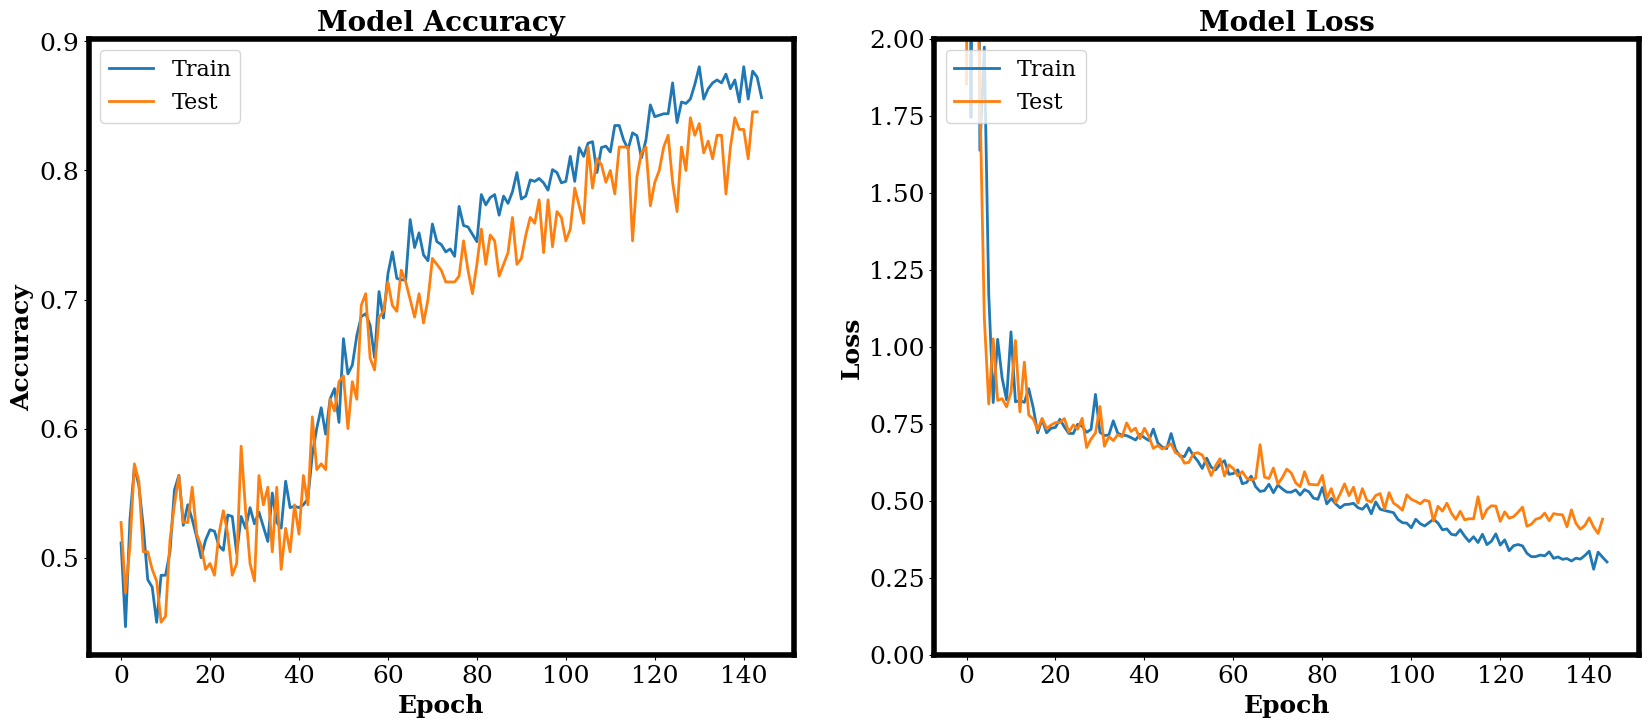

In [16]:
#plotting accuracy
mpl.rc_file_defaults()
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 4

fig, axs = plt.subplots(1,2, figsize = (20,8))

axs[0].plot(np.array(accs), label="acc", linewidth = 2)
axs[0].plot(np.array(val_accs), label="val_acc" , linewidth = 2)
axs[0].set_title('Model Accuracy', fontsize = 20, fontweight = 'bold')
axs[0].set_ylabel('Accuracy', fontsize = 18, fontweight = 'bold')
axs[0].set_xlabel('Epoch', fontsize = 18, fontweight = 'bold')
axs[0].legend(['Train', 'Test'], loc='upper left',  fontsize = 16)

axs[1].plot(np.array(losses), label="loss", linewidth = 2)
axs[1].plot(np.array(val_losses), label="val_loss", linewidth = 2)
axs[1].set_title('Model Loss', fontsize = 20, fontweight = 'bold')
axs[1].set_ylabel('Loss', fontsize = 18, fontweight = 'bold')
axs[1].set_xlabel('Epoch', fontsize = 18, fontweight = 'bold')
axs[1].set_ylim(0,2)
axs[1].legend(['Train', 'Test'], loc='upper left',  fontsize = 16)

plt.show()

In [ ]:
# !mkdir -p saved_model
bcnn.save('drive/MyDrive/MODELS/bcnn_3009')

INFO:tensorflow:Assets written to: drive/MyDrive/MODELS/bcnn_3009/assets


# Load Saved Model

In [ ]:
# velocity + dispersion
# bcnn = tf.keras.models.load_model('drive/MyDrive/MODELS/bcnn_2408')
# velocity + dispersion + sigscale
bcnn = tf.keras.models.load_model('drive/MyDrive/MODELS/bcnn_3009')

# Check its architecture
bcnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d_flipout (Conv2DFlipou (None, 25, 25, 16)        880       
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 16)        0         
_________________________________________________________________
activation (Activation)      (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_flipout_1 (Conv2DFlip (None, 13, 13, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0     

# Test on previous wrongs (tully fisher)

In [ ]:
wrong = [16022,
 54270,
 70022,
 92592,
 93020,
 93803,
 185567,
 205161,
 230776,
 238131,
 323242,
 378104,
 380578,
 383147,
 561488,
 9011900152,
 9011900547,
 9239900248,
 9388000001,
 9388000068]

wrong = np.array(wrong)

In [ ]:
ab =[]
for i in range(0, np.size(wrong)):
  a = np.where(wrong[i] == Z)[0][0]
  ab.append(a)
ab = np.array(ab)

In [ ]:
testing = X_total[ab]

In [ ]:
# n_mc_run = 500
# med_prob_thres = 0.65

# y_pred_logits_list = [bcnn(testing) for _ in range(n_mc_run)]  # a list of predicted logits
# y_pred_prob_all = np.concatenate([tf.nn.softmax(y, axis=-1)[:, :, np.newaxis] for y in y_pred_logits_list], axis=-1)
# y_pred = [[int(np.median(y) >= med_prob_thres) for y in y_pred_prob] for y_pred_prob in y_pred_prob_all]
# y_pred = np.array(y_pred)

# idx_valid = [any(y) for y in y_pred]
# print('Number of recognizable samples:', sum(idx_valid))

# idx_invalid = [not any(y) for y in y_pred]
# print('Number of unrecognizable samples:', sum(idx_invalid))

# prop = sum(idx_valid)/ (sum(idx_valid) + sum(idx_invalid))
# print('Proportion of recognizable samples:', prop)

# print('Location of Unrecognizable samples:', np.where(idx_invalid)[0])

# # print('Test accuracy on recognizable samples:',
# #       sum(np.equal(np.argmax(Y_val[idx_valid], axis=-1), np.argmax(y_pred[idx_valid], axis=-1))) / len(Y_val[idx_valid]))

# # print('Test accuracy on unrecognizable samples:',
# #       sum(np.equal(np.argmax(Y_val[idx_invalid], axis=-1), np.argmax(y_pred[idx_invalid], axis=-1))) / len(Y_val[idx_invalid]))

Number of recognizable samples: 14
Number of unrecognizable samples: 6
Proportion of recognizable samples: 0.7
Location of Unrecognizable samples: [ 0  1  4  8  9 15]


In [ ]:
ahh = []
for i in range(0, np.shape(y_pred)[0]):
  guess = y_pred[i][1]
  ahh.append(guess)

In [ ]:
real = [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]

In [ ]:
real = np.array(real)
ahh = np.array(ahh)

In [ ]:
# a = 0
# for i in range(0, np.size(real)):
#   if real[i] == ahh[i]:
#     a = a+1
#     print('Index Correct: ' + str(i))
#     print(wrong[i])
# print((a/20)*100)

Index Correct: 0
16022
Index Correct: 2
70022
Index Correct: 3
92592
Index Correct: 4
93020
Index Correct: 5
93803
Index Correct: 6
185567
Index Correct: 7
205161
Index Correct: 8
230776
Index Correct: 9
238131
Index Correct: 11
378104
Index Correct: 12
380578
Index Correct: 13
383147
Index Correct: 15
9011900152
Index Correct: 16
9011900547
Index Correct: 17
9239900248
Index Correct: 18
9388000001
80.0


# Run Bayesian Model

In [ ]:
n_mc_run = 500
med_prob_thres = 0.65

y_pred_logits_list = [bcnn(X_val) for _ in range(n_mc_run)]  # a list of predicted logits
y_pred_prob_all = np.concatenate([tf.nn.softmax(y, axis=-1)[:, :, np.newaxis] for y in y_pred_logits_list], axis=-1)
y_pred = [[int(np.median(y) >= med_prob_thres) for y in y_pred_prob] for y_pred_prob in y_pred_prob_all]
y_pred = np.array(y_pred)

idx_valid = [any(y) for y in y_pred]
print('Number of recognizable samples:', sum(idx_valid))

idx_invalid = [not any(y) for y in y_pred]
print('Number of unrecognizable samples:', sum(idx_invalid))

prop = sum(idx_valid)/ (sum(idx_valid) + sum(idx_invalid))
print('Proportion of recognizable samples:', prop)

print('Location of Unrecognizable samples:', np.where(idx_invalid)[0])

print('Test accuracy on recognizable samples:',
      sum(np.equal(np.argmax(Y_val[idx_valid], axis=-1), np.argmax(y_pred[idx_valid], axis=-1))) / len(Y_val[idx_valid]))

print('Test accuracy on unrecognizable samples:',
      sum(np.equal(np.argmax(Y_val[idx_invalid], axis=-1), np.argmax(y_pred[idx_invalid], axis=-1))) / len(Y_val[idx_invalid]))

Number of recognizable samples: 226
Number of unrecognizable samples: 23
Proportion of recognizable samples: 0.9076305220883534
Location of Unrecognizable samples: [ 20  35  36  50  59  68  70  78  92  99 136 140 150 154 157 159 179 180
 188 196 201 209 236]
Test accuracy on recognizable samples: 0.9424778761061947
Test accuracy on unrecognizable samples: 0.4782608695652174


In [ ]:
def plot_pred_hist(y_pred, prob_use, n_class, n_mc_run, n_bins=6, med_prob_thres=0.2, n_subplot_rows=2, figsize=(18, 10)):
    # bins = np.logspace(-2, 0, n_bins+1)
    bins = np.linspace(0,1,50)
    # bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    classes = ['Non-Obvious Rotation Probability', 'Obvious Rotation Probability'] 
    fig, ax = plt.subplots(n_subplot_rows, n_class // n_subplot_rows + 1, figsize=figsize)
    for i in range(n_subplot_rows):
        for j in range(n_class // n_subplot_rows + 1):
            idx = i * (n_class // n_subplot_rows + 1) + j
            class2 = idx % 2
            class1 = classes[class2]
            # print(j)
            prob_useval = prob_use[j]
            # print(idx)
            
            if idx < n_class:
                ax[i, j].hist(y_pred[idx], bins)
                # count, _ = np.histogram((y_pred[idx], bins))
                # rrr = np.max(count)
                # ax[i, j].set_xscale('log')
                ax[i, j].axvline(0.45, c = 'r', label = 'Confidence Threshold')
                ax[i, j].axvline(prob_useval, c = 'g', label = '16th Percentile')
                ax[i, j].legend()
                # ax[i, j].set_ylim([0, rrr])
                ax[i, j].set_xlabel(classes[j])
                ax[i, j].set_ylabel('N')
                # ax[i, j].title.set_text("{} (median: {:.2f}) ({})".format(str(class1),
                # np.median(y_pred[idx]),
                # str(np.median(y_pred[idx]) >= med_prob_thres)))            
            else:
                ax[i, j].axis('off')
    plt.show()

In [ ]:
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 4

In [ ]:
for i in range(130,160):
  print(np.median(y_pred_prob_all[i][1]))

0.9821956
0.99999976
1.0
0.9972044
0.9629776
1.0
0.6168796
0.9861364
0.9999979
0.77871275
0.44989154
0.99999976
0.97034717
0.99999774
0.07358731
0.013828816
0.0014637789
7.81059e-06
0.008963071
0.3394461
0.35911852
0.00045738212
0.1280838
0.0001848929
0.5753895
0.07816959
0.31221715
0.37713552
0.19299892
0.5539974


In [ ]:
prob_use = np.array([p1, p2])
prob_use[1]

0.22804383099079134

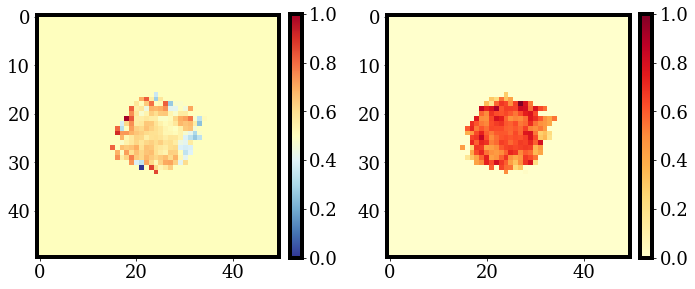

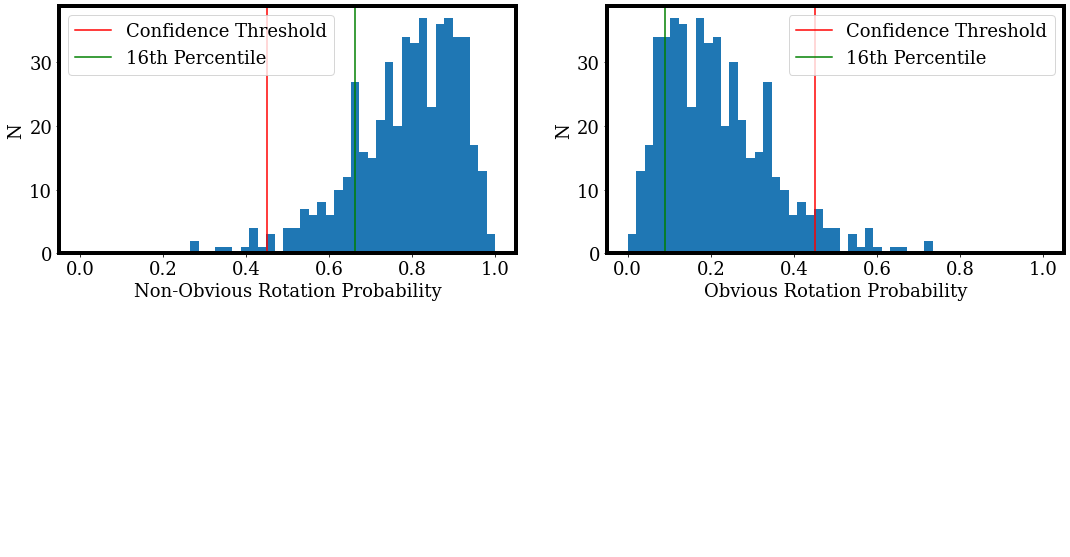

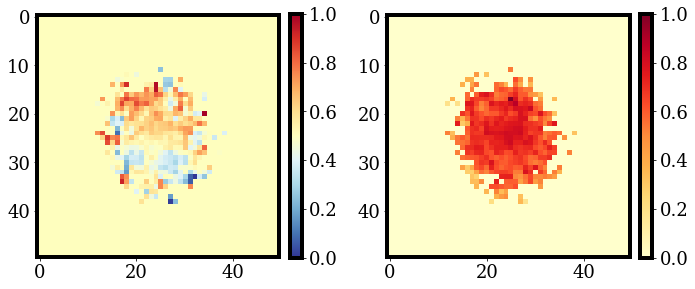

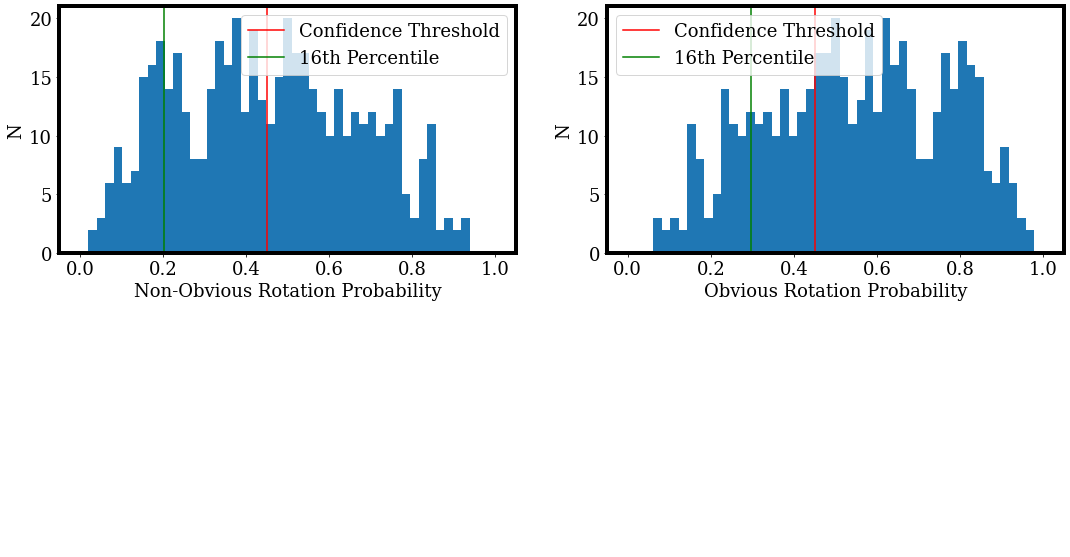

In [ ]:
for a in range(158,160):
  class_nmr = 2
  p1 = np.percentile(y_pred_prob_all[a][0], 16)
  p2 = np.percentile(y_pred_prob_all[a][1], 16)
  prob_use = np.array([p1, p2])
  fig, axs = plt.subplots(1,2, figsize = (10, 14))
  ab = axs[0].imshow(X_val[a, :, :, 0], cmap='RdYlBu_r')
  # axs[0].set_title('Velocity Map')
  # axs[0].set_xlabel('Probability - NOR')
  # axs[0].set_ylabel('N')
  fig.colorbar(ab, ax = axs[0],fraction=0.046, pad=0.04)
  ac = axs[1].imshow(X_val[a, :, :, 1], cmap='YlOrRd')
  # axs[1].set_title('Dispersion Map')
  # axs[1].set_xlabel('Probability - OR')
  # axs[1].set_ylabel('N')
  # axs[0].set_xlabel('Probability - NOR')
  # axs[0].set_ylabel('N')
  fig.colorbar(ac, ax = axs[1],fraction=0.046, pad=0.04)
  plt.tight_layout()

  plot_pred_hist(y_pred_prob_all[a],prob_use, class_nmr, n_mc_run, med_prob_thres=med_prob_thres)

0.22804383099079134


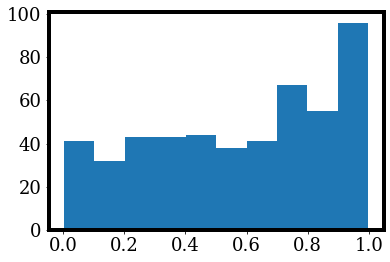

In [ ]:
plt.hist(y_pred_prob_all[20][1])
print(np.percentile(y_pred_prob_all[20][1],16))

In [ ]:
np.percentile(y_pred_prob_all[10][0], 16)

0.37624440908432005

In [ ]:
np.percentile(y_pred_prob_all[10][1], 16)

0.2785207223892212

In [ ]:
print(np.median(y_pred_prob_all[10][0]))

0.5550774


In [ ]:
sami_catids2 = []
for i in range(0, np.shape(y_pred)[0]):
  catid = Z_val[i]
  sami_catids2.append(catid)

In [ ]:
# sami_NORs = []
# sami_ORs = []
# # sami_classes = []
# sami_catids = []
# sami_min16OR = []
# sami_min16NOR = []

# for i in range(0, np.shape(y_pred)[0]):
#   catid = Z_val[i]
#   sami_NOR = np.median(y_pred_prob_all[i][0])
#   sami_OR = np.median(y_pred_prob_all[i][1])
#   min16NOR = np.percentile(y_pred_prob_all[i][0], 16)
#   min16OR = np.percentile(y_pred_prob_all[i][1], 16)
#   # sami_class = y_pred[i][1]

#   # if min16NOR > 0.45:
#   #   sami_classes.append(0)
#   # elif min16OR > 0.45:
#   #   sami_classes.append(1)
#   # else:
#   #   sami_classes.append(2)
#   sami_min16NOR.append(min16NOR)
#   sami_min16OR.append(min16OR)
#   # sami_classes.append(sami_class)
#   sami_NORs.append(sami_NOR)
#   sami_ORs.append(sami_OR)
#   sami_catids.append(catid)

# np.shape(sami_catids)

In [ ]:

np.shape(sami_catids)

(1242,)

In [ ]:
n_mc_run = 500
med_prob_thres = 0.65

y_pred_logits_list = [bcnn(X_unlabelled) for _ in range(n_mc_run)]  # a list of predicted logits
y_pred_prob_all = np.concatenate([tf.nn.softmax(y, axis=-1)[:, :, np.newaxis] for y in y_pred_logits_list], axis=-1)
y_pred = [[int(np.median(y) >= med_prob_thres) for y in y_pred_prob] for y_pred_prob in y_pred_prob_all]
y_pred = np.array(y_pred)

idx_valid = [any(y) for y in y_pred]
print('Number of recognizable samples:', sum(idx_valid))

idx_invalid = [not any(y) for y in y_pred]
print('Number of unrecognizable samples:', sum(idx_invalid))

prop = sum(idx_valid)/ (sum(idx_valid) + sum(idx_invalid))
print('Proportion of recognizable samples:', prop)

print('Location of Unrecognizable samples:', np.where(idx_invalid)[0])

# print('Test accuracy on recognizable samples:',
#       sum(np.equal(np.argmax(Y_val[idx_valid], axis=-1), np.argmax(y_pred[idx_valid], axis=-1))) / len(Y_val[idx_valid]))

# print('Test accuracy on unrecognizable samples:',
#       sum(np.equal(np.argmax(Y_val[idx_invalid], axis=-1), np.argmax(y_pred[idx_invalid], axis=-1))) / len(Y_val[idx_invalid]))

Number of recognizable samples: 2276
Number of unrecognizable samples: 663
Proportion of recognizable samples: 0.7744130656685948
Location of Unrecognizable samples: [   6   10   14   15   16   26   40   44   50   54   61   62   65   72
   73   81   83   86   87   88   89   93   95   96  104  115  117  119
  120  121  122  128  145  146  150  153  160  161  164  165  172  173
  176  179  188  190  191  192  194  195  196  197  199  209  210  211
  212  213  216  217  221  224  229  230  233  234  237  243  244  245
  246  251  252  253  254  264  269  271  278  284  285  286  287  288
  293  296  306  307  314  315  316  317  318  319  325  330  336  337
  343  344  353  354  356  357  358  361  363  383  384  394  399  401
  402  407  414  415  416  419  423  424  426  431  438  442  443  453
  454  456  460  461  465  466  468  469  472  477  488  490  499  500
  503  507  523  534  539  540  541  544  548  549  552  554  563  568
  570  571  586  589  590  595  598  599  604  609  6

In [ ]:
np.shape(y_pred)

(2939, 2)

In [ ]:
sami_NORs = []
sami_ORs = []
sami_classes = []
sami_catids = []
# sami_min16OR = []
# sami_min16NOR = []

for i in range(0, np.shape(y_pred)[0]):
  catid = Z_unlabelled[i]
  sami_NOR = np.median(y_pred_prob_all[i][0])
  sami_OR = np.median(y_pred_prob_all[i][1])
  min16NOR = np.percentile(y_pred_prob_all[i][0], 16)
  min16OR = np.percentile(y_pred_prob_all[i][1], 16)
  # sami_class = y_pred[i][1]

  if min16NOR > 0.45:
    sami_classes.append(0)
  elif min16OR > 0.45:
    sami_classes.append(1)
  else:
    sami_classes.append(2)
  # sami_min16NOR.append(min16NOR)
  # sami_min16OR.append(min16OR)
  # sami_classes.append(sami_class)
  sami_NORs.append(sami_NOR)
  sami_ORs.append(sami_OR)
  sami_catids.append(catid)

np.shape(sami_catids)

(2939,)

In [ ]:
sami_catids.append(209613)
sami_ORs.append(np.NaN)
sami_NORs.append(np.NaN)
sami_classes.append(np.NaN)

In [ ]:
np.shape(sami_catids)

(2940,)

In [ ]:
np.shape(sami_classes)

(2939,)

In [ ]:
sami_catids

array([      9352,      23623,      56061, ..., 9403801272, 9403801281,
       9403801579])

In [ ]:
# sami_min16OR = np.array(sami_min16OR)
# sami_min16NOR = np.array(sami_min16NOR)
sami_NORs = np.array(sami_NORs)
sami_ORs = np.array(sami_ORs)
# sami_classes = np.array(sami_classes)
sami_catids = np.array(sami_catids)

In [ ]:
# sami_min16OR_test = sami_min16OR
# sami_min16NOR_test = sami_min16NOR
sami_NORs_test = sami_NORs
sami_ORs_test = sami_ORs
# sami_classes_test = sami_classes
sami_catids_test = sami_catids

(array([420.,  60.,  37.,  48.,  39.,  34.,  30.,  38.,  49., 487.]),
 array([4.17999166e-09, 1.00000004e-01, 2.00000003e-01, 3.00000003e-01,
        4.00000003e-01, 5.00000002e-01, 6.00000002e-01, 7.00000001e-01,
        8.00000001e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

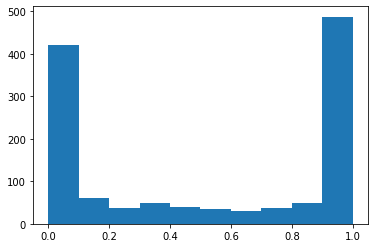

In [ ]:
plt.hist(sami_min16OR)

In [ ]:
OR_44 = []
NOR_44 = []
catids_44 = []
bcnn_44 = []
unks = []

for val in sami_catids_test:
  if val in catids_44:
    continue
  else:
    catids_44.append(val)
  idx = []
  
  #look for locations where the string matches
  for a in range(0, np.size(sami_catids_test)):
    if sami_catids_test[a] == val:
      idx.append(a)
  
  idx = np.array(idx)

  # bcnn_0 = sami_classes_test[idx]
  OR_0 = sami_ORs_test[idx]
  NOR_0 = sami_NORs_test[idx]
  NOR16 = sami_min16NOR_test[idx]
  OR16 = sami_min16OR_test[idx]

  new_OR = np.mean(OR_0)
  OR_44.append(new_OR)

  new_NOR = np.mean(NOR_0)
  NOR_44.append(new_NOR)

  NOR16new = np.mean(NOR16)
  OR16new = np.mean(OR16)

  if OR16new > 0.5:
    unks.append(1)
  elif NOR16new > 0.5:
    unks.append(0)
  else:
    unks.append(2)

  if new_OR > new_NOR:
    new_bcnn = 1
  else:
    new_bcnn = 0
  bcnn_44.append(new_bcnn)

OR_44 = np.array(OR_44)
NOR_44 = np.array(NOR_44)
catids_44 = np.array(catids_44)
bcnn_44 = np.array(bcnn_44)
unks = np.array(unks)


In [ ]:
Z = np.load(path + 'catid_ext_human_190921.npy')
Y = np.load(path + 'label_human_190921.npy')

In [ ]:
Z = np.load(path + 'catid_ext_human_190921.npy')
Y = np.load(path + 'label_human_190921.npy')
unks3 = np.load(path + 'bcnn_class_proper_2009_3.npy')
nor_human = np.load(path + 'NOR_prob_new_2009_3.npy')
or_human = np.load(path + 'OR_prob_new_2009_3.npy')

catids1 = np.hstack([Z, sami_catids])
classes = np.hstack([unks3, sami_classes])
ors = np.hstack([or_human, sami_ORs])
nors = np.hstack([nor_human, sami_NORs])


In [ ]:
np.shape(catids1)

(3430,)

In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
cat = Table.read(path2 + 'bcnn_kinematics_r8.fits', hdu = 1)

In [ ]:
catext = cat.field('CATID_EXT')
galflag = cat.field('GAL_FLAG')

catext = np.array(catext)
galflag = np.array(galflag)

In [ ]:
OR_66 = []
NOR_66 = []
catids_66 = []
bcnn_66 = []

for i in range(0, np.size(catext)):
  check = catext[i]
  idx = np.where(check == catids1)
  if np.size(idx) > 0:
    idxx = idx[0][0]
    # if galflag[idxx] == 0 or galflag[idxx] == 4:
    orval = ors[idxx]
    norval = nors[idxx]
    class1 = classes[idxx]
    OR_66.append(orval)
    NOR_66.append(norval)
    bcnn_66.append(class1)

    # else:
    #   OR_66.append(np.NaN)
    #   NOR_66.append(np.NaN)
    #   bcnn_66.append(np.NaN)

  else:
    OR_66.append(np.NaN)
    NOR_66.append(np.NaN)
    bcnn_66.append(np.NaN)



(array([ 341.,    0.,    0.,    0.,    0., 2729.,    0.,    0.,    0.,
         359.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

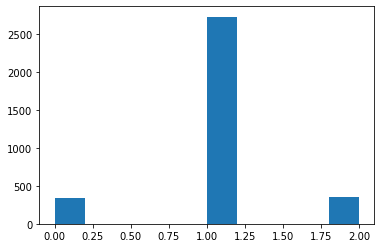

In [ ]:
plt.hist(bcnn_66)

In [ ]:
np.shape(bcnn_66)

(3430,)

(array([ 346.,    0.,    0.,    0.,    0., 2740.,    0.,    0.,    0.,
         343.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

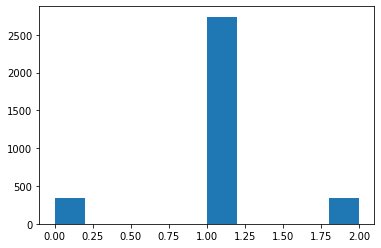

In [ ]:
plt.hist(bcnn_66)

In [ ]:
OR_66 = np.array(OR_66)
NOR_66 = np.array(NOR_66)
# catids_66 = np.array()
bcnn_66 = np.array(bcnn_66)

OR_1 = np.save(path + 'OR_prob_final4_2809', OR_66)
NOR_1 = np.save(path + 'NOR_prob_final4_2809', NOR_66)
# catids_1 = np.save(path + 'catids_final_2809', catids3)
bcnn_1 = np.save(path + 'bcnn_class_final4_2809', bcnn_66)
# bcnn_2 = np.save(path + 'bcnn_class_proper_2809', unks3)

In [ ]:
cats = []
cats2 = []
idxs = []
for i in range(0, np.size(Z)):
  # if unks[i] < 2:
  cat = Z[i]
  yright = Y[i]
  a = np.where(cat == catids_44)[0][0]
  # print(a)
  idxs.append(a)
  yval = bcnn_44[a]
  if yval != yright:
    cats.append(cat)
  else:
    cats2.append(cat)

idxs = np.array(idxs)
unks3 = unks[idxs]
bcnn3 = bcnn_44[idxs]
OR3 = OR_44[idxs]
NOR3 = NOR_44[idxs]
cats_check = catids_44[idxs]

In [ ]:
idxs = []
yep = 0
for i in range(0, np.size(unks3)):
  val = unks3[i]
  if val == 2:
    continue
  else:
    if val == Y[i]:
      yep = yep+1
    idxs.append(i)
idxs = np.array(idxs)
# unks2

In [ ]:
yep

407

In [ ]:
438/490

0.8938775510204081

In [ ]:
np.size(idxs)

436

In [ ]:
conf_guess = unks3[idxs]
correct_guess = Y[idxs]

In [ ]:
490-61

429

In [ ]:
np.size(cats2)

461

In [ ]:
490-61

429

In [ ]:
correct = []
incorrect = []
real = []
for i in range(0, np.size(unks)):
  if unks[i] < 2:
    if unks[i] == Y[i]:
      correct.append([Z[i], unks[i]])
    else:
      incorrect.append([Z[i], unks[i]])
      real.append(Y[i])

In [ ]:
np.shape(correct)

(258, 2)

In [ ]:
OR_44 = np.array(OR_44)
NOR_44 = np.array(NOR_44)
bcnn_44 = np.array(bcnn_44)
catids_44 = np.array(catids_44)
unks = np.array(unks)

In [ ]:
bcnn_44[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
# for i in range(0, np.size(CATID_12)):
#   val = CATID_12[i]
#   a = np.where(val == Z)[0][0]
#   actual = Y[a]
#   check = unks3[a]
#   print(val)
#   print('CNN:',check)
#   print('HUMAN: ', actual)

In [ ]:
CATID_12 = [16022,
 54270,
 70022,
 92592,
 93020,
 93803,
 185567,
 205161,
 230776,
 238131,
 323242,
 378104,
 380578,
 383147,
 561488,
 9011900152,
 9011900547,
 9239900248,
 9388000001,
 9388000068]

In [ ]:
CATID_12 = np.array(CATID_12)

In [ ]:
unks2[0:10]

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

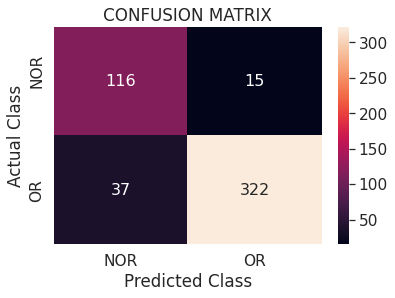

In [ ]:
confusion = tf.math.confusion_matrix(labels=Y, predictions=bcnn3)

array = np.array(confusion)

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.5g') # font size
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
plt.xticks(ticks = (0.5, 1.5), labels = ('NOR', 'OR'))
plt.yticks(ticks = (0.4, 1.5), labels = ('NOR', 'OR'))
plt.title('CONFUSION MATRIX')

plt.show()

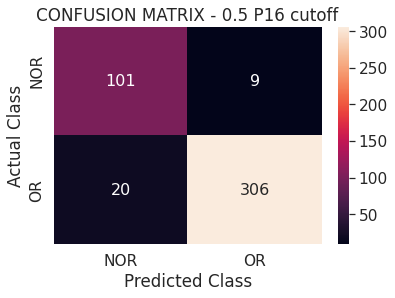

In [ ]:
confusion = tf.math.confusion_matrix(labels=correct_guess, predictions=conf_guess)

array = np.array(confusion)

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.5g') # font size
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
plt.xticks(ticks = (0.5, 1.5), labels = ('NOR', 'OR'))
plt.yticks(ticks = (0.4, 1.5), labels = ('NOR', 'OR'))
plt.title('CONFUSION MATRIX - 0.5 P16 cutoff')

plt.show()

In [ ]:
OR_1 = np.save(path + 'OR_prob_new_2809', OR3)
NOR_1 = np.save(path + 'NOR_prob_new_2809', NOR3)
# catids_1 = np.save(path + 'catids_new_2809', catids3)
bcnn_1 = np.save(path + 'bcnn_class_new_2809', bcnn3)
bcnn_2 = np.save(path + 'bcnn_class_proper_2809', unks3)


In [ ]:
OR_44 = np.load(path + 'OR_prob_new_1909.npy')
NOR_44 = np.load(path + 'NOR_prob_new_1909.npy')
catids_44 = np.load(path + 'catids_new_1909.npy')
bcnn_44 = np.load(path + 'bcnn_class_new_1909.npy')
unks = np.load(path + 'bcnn_class_unknowns_1909.npy')

In [ ]:
Z = np.load(path + 'catid_ext_human_190921.npy')
Y = np.load(path + 'label_human_190921.npy')

In [ ]:
bcnn_44

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
np.shape(bcnn_44)

(490,)

In [ ]:
np.size(Z)

1242

In [ ]:
cats = []
for i in range(0, np.size(Z)):
  cat = Z[i]
  yright = Y[i]
  a = np.where(cat == catids_44)[0]
  yval = bcnn_44[a]
  if yval != yright:
    cats.append(cat)

In [ ]:
cats = np.array(cats)

In [ ]:
439/490

0.8959183673469387

In [ ]:
# OR_probs_unlabelled = []
# NOR_probs_unlabelled = []
# catids_unlabelled = []
# bcnn_classes_unlabelled = []
# bcnn_stds_unlabelled = []

for x in range (0, np.size(Z_unlabelled)):
  catid = Z_unlabelled[x]
  OR_prob = np.median(y_pred_prob_all[x][1])
  NOR_prob = np.median(y_pred_prob_all[x][0])
  bcnn_class = y_pred[x][1]
  bcnn_std_unlabelled = np.std(y_pred_prob_all[x][0])

  catids_unlabelled.append(catid)
  OR_probs_unlabelled.append(OR_prob)
  NOR_probs_unlabelled.append(NOR_prob)
  bcnn_classes_unlabelled.append(bcnn_class)
  bcnn_stds_unlabelled.append(bcnn_std_unlabelled)

# OR_probs_unlabelled = np.array(OR_probs_unlabelled)
# NOR_probs_unlabelled = np.array(NOR_probs_unlabelled)
# catids_unlabelled = np.array(catids_unlabelled)
# bcnn_classes_unlabelled = np.array(bcnn_classes_unlabelled)
# bcnn_stds_unlabelled = np.array(bcnn_stds_unlabelled)

# Magneticum Simulations

In [18]:
X_mag_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_mag_271021.npy')
X_mag_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_mag_271021.npy')

Z_mag = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/catid_mag_271021.npy')

# stack the velocity and sigma maps 

X_mag_total = np.concatenate((X_mag_vel, X_mag_sig), axis = 3)


In [ ]:
mag_NORs = []
mag_ORs = []

mag_class1 = []


for i in range(0, np.shape(y_pred)[0]):
  mag_NOR = np.median(y_pred_prob_all[i][0])
  mag_OR = np.median(y_pred_prob_all[i][1])

  min16NOR = np.percentile(y_pred_prob_all[i][0], 16)
  min16OR = np.percentile(y_pred_prob_all[i][1], 16)

  if min16NOR > 0.5:
    mag_class1.append(0)
  if min16OR > 0.5:
    mag_class1.append(1)
  if min16NOR < 0.5 and min16OR < 0.5:
    mag_class1.append(2)

  mag_NORs.append(mag_NOR)
  mag_ORs.append(mag_OR)

mag_NORs = np.array(mag_NORs)
mag_ORs = np.array(mag_ORs)
mag_class = np.array(mag_class1)

(array([ 40.,   0.,   0.,   0.,   0., 434.,   0.,   0.,   0.,  26.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

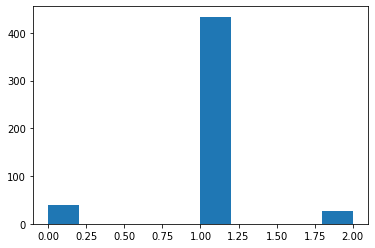

In [ ]:
plt.hist(mag_class1)

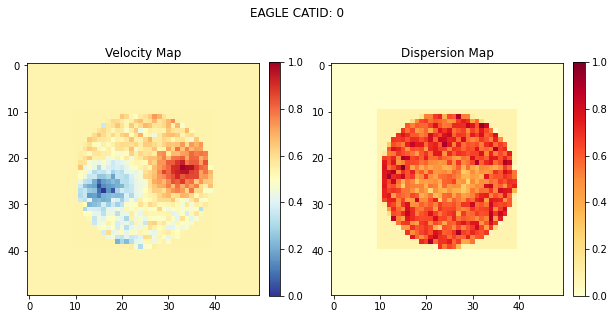

<Figure size 432x288 with 0 Axes>

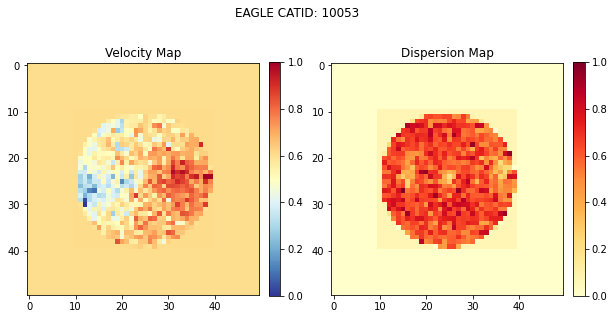

<Figure size 432x288 with 0 Axes>

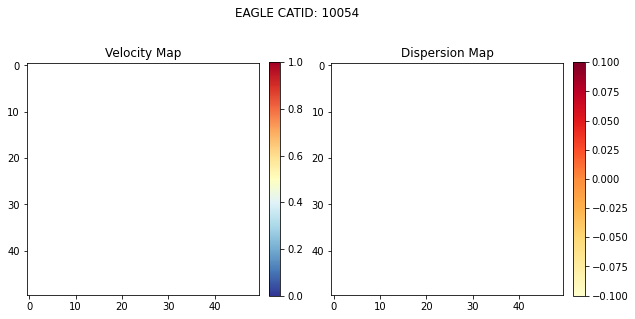

<Figure size 432x288 with 0 Axes>

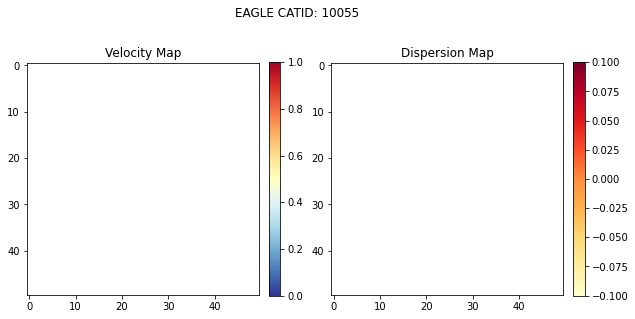

<Figure size 432x288 with 0 Axes>

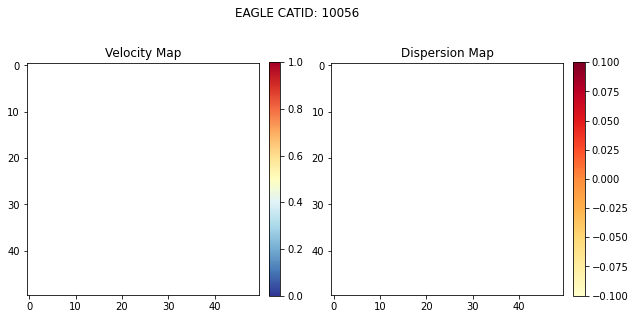

<Figure size 432x288 with 0 Axes>

In [ ]:
## First 5 data points

catids_use = Z_mag[0:5]
# pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')
for i in range(0,np.size(catids_use)):
  catid = catids_use[i]
  # idx = np.where(catid == eagle_ID)[0][0]
  idx = i

  # print(idx)
  # catid = eagle_ID[idx]

  # if label == 0:
  #   label = class_names[0]
  # else:
  #   label = class_names[1]

  # print("True label of the test sample {}: {}".format(idx, np.argmax(Y[idx], axis=-1)))
  fig, axs = plt.subplots(1, 2, figsize = (10, 5))
  fig.suptitle('EAGLE CATID: ' + str(catid))

  map1 = X_mag_total[idx, :, :, 0]
  # print(np.shape(map1))

  a = axs[0].imshow(map1, cmap='RdYlBu_r', vmax = 1, vmin = 0)
  axs[0].set_title('Velocity Map')
  fig.colorbar(a, ax=axs[0], fraction=0.046, pad=0.04)

  b = axs[1].imshow(X_mag_total[idx, :, :, 1], cmap='YlOrRd')
  axs[1].set_title('Dispersion Map')
  fig.colorbar(b, ax=axs[1], fraction=0.046, pad=0.04)
  plt.show()
  plt.tight_layout()


In [19]:
n_mc_run = 500
med_prob_thres = 0.65

y_pred_logits_list = [bcnn(X_mag_total) for _ in range(n_mc_run)]  # a list of predicted logits
y_pred_prob_all = np.concatenate([tf.nn.softmax(y, axis=-1)[:, :, np.newaxis] for y in y_pred_logits_list], axis=-1)
y_pred = [[int(np.median(y) >= med_prob_thres) for y in y_pred_prob] for y_pred_prob in y_pred_prob_all]
y_pred = np.array(y_pred)

idx_valid = [any(y) for y in y_pred]
print('Number of recognizable samples:', sum(idx_valid))

idx_invalid = [not any(y) for y in y_pred]
print('Number of unrecognizable samples:', sum(idx_invalid))

prop = sum(idx_valid)/ (sum(idx_valid) + sum(idx_invalid))
print('Proportion of recognizable samples:', prop)

# print('Location of Unrecognizable samples:', np.where(idx_invalid)[0])

Number of recognizable samples: 1810
Number of unrecognizable samples: 87
Proportion of recognizable samples: 0.9541381128096995


In [22]:
mag_NORs = []
mag_ORs = []
mag_class1 = []

for i in range(0, np.shape(y_pred)[0]):
  mag_NOR = np.median(y_pred_prob_all[i][0])
  mag_OR = np.median(y_pred_prob_all[i][1])

  min16NOR = np.percentile(y_pred_prob_all[i][0], 16)
  min16OR = np.percentile(y_pred_prob_all[i][1], 16)

  if min16NOR > 0.45:
    mag_class1.append(0)

  elif min16OR > 0.45:
    mag_class1.append(1)
  else:
    mag_class1.append(2)

  mag_NORs.append(mag_NOR)
  mag_ORs.append(mag_OR)

mag_NORs = np.array(mag_NORs)
mag_ORs = np.array(mag_ORs)
mag_class = np.array(mag_class1)

(array([ 220.,    0.,    0.,    0.,    0., 1576.,    0.,    0.,    0.,
         101.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

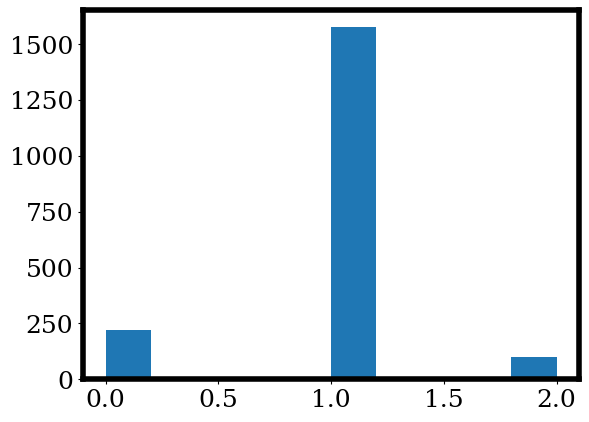

In [23]:
plt.hist(mag_class)

In [ ]:
# valid = np.where(idx_valid)[0]
# visclasses = []
# bcnn_classes = []
# idxs = []
# catids_wrong = []

# for x in valid:
#   catid = Z_val[x]
#   visclass = int(Y_val[x][1])
#   bcnn_class = y_pred[x][1]

#   if visclass != bcnn_class:
#     catids_wrong.append(catid)
#     idxs.append(x)

#   visclasses.append(visclass)
#   bcnn_classes.append(bcnn_class)

In [ ]:
# catids_wrong

In [ ]:
# fig,axs = plt.subplots(1,5, figsize = (32, 5))

# for n in range(0,5):
#   A1 = axs[n].pcolor(X_val[idxs[n], :,:,0], cmap = 'RdYlBu_r', vmax = 1, vmin = 0)
#   guess = str(y_pred[idxs[n]][1])
#   val = str(int(Y_val[idxs[n]][1]))
#   catid = catids_wrong[n]
#   axs[n].set_title('CATID: ' + str(catid) + '   Val: ' +val + '   Guess:'  +  guess)
#   fig.colorbar(A1, ax = axs[n],  fraction=0.046, pad=0.04)


In [ ]:
# fig,axs = plt.subplots(1,5, figsize = (30, 5))

# for n in range(0,5):
#   r = n+5
#   A1 = axs[n].pcolor(X_val[idxs[r], :,:,0], cmap = 'RdYlBu_r', vmax = 1, vmin = 0)
#   guess = str(y_pred[idxs[r]][1])
#   val = str(int(Y_val[idxs[r]][1]))
#   catid = catids_wrong[r]
#   axs[n].set_title('CATID: ' + str(catid) + '   Val: ' +val + '   Guess:'  +  guess)

# fig.colorbar(A1)

In [ ]:
OR_probs_mag = []
NOR_probs_mag = []
catids_mag = []
bcnn_classes_mag = []
bcnn_stds_mag = []

# valid = np.where(idx_valid)[0]

for x in range (0, np.size(Z_mag)):
  catid = Z_mag[x]
  OR_prob = np.median(y_pred_prob_all[x][1])
  NOR_prob = np.median(y_pred_prob_all[x][0])
  bcnn_class = y_pred[x][1]
  bcnn_std = np.std(y_pred_prob_all[x][0])

  catids_mag.append(catid)
  OR_probs_mag.append(OR_prob)
  NOR_probs_mag.append(NOR_prob)
  bcnn_classes_mag.append(bcnn_class)
  bcnn_stds_mag.append(bcnn_std)


In [ ]:
path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
eagle_NORsave = np.save(path + 'mag_NOR_271021.npy', mag_NORs)
eagle_ORsave = np.save(path + 'mag_OR_271021.npy', mag_ORs)
# eagle_stdsave = np.save(path + 'mag_std_271021.npy', bcnn_stds_mag)
eagle_classave = np.save(path + 'mag_class_271021.npy', mag_class)


In [ ]:
eagle_classave = np.save(path + 'mag_catid_271021.npy', Z_mag)

In [ ]:
Z_mag[80]

11954

In [ ]:
np.shape(OR_probs_mag)

(500,)

In [ ]:
n_mc_run = 250
med_prob_thres = 0.65

y_pred_logits_list = [bcnn(X_unlabelled) for _ in range(n_mc_run)]  # a list of predicted logits
y_pred_prob_all = np.concatenate([tf.nn.softmax(y, axis=-1)[:, :, np.newaxis] for y in y_pred_logits_list], axis=-1)
y_pred = [[int(np.median(y) >= med_prob_thres) for y in y_pred_prob] for y_pred_prob in y_pred_prob_all]
y_pred = np.array(y_pred)

idx_valid = [any(y) for y in y_pred]
print('Number of recognizable samples:', sum(idx_valid))

idx_invalid = [not any(y) for y in y_pred]
print('Number of unrecognizable samples:', sum(idx_invalid))

prop = sum(idx_valid)/ (sum(idx_valid) + sum(idx_invalid))
print('Proportion of recognizable samples:', prop)

# print('Location of Unrecognizable samples:', np.where(idx_invalid)[0])

Number of recognizable samples: 2291
Number of unrecognizable samples: 648
Proportion of recognizable samples: 0.7795168424634229


In [ ]:
# counts = 0
# for x in range(0,1000):
#   # print('GALAXY:', x)
#   NOR = np.median(y_pred_prob_all[x][0])
#   OR = np.median(y_pred_prob_all[x][1])
#   if NOR > OR:
#     # print('NOR, CONFIDENCE:', NOR)
#     conf = NOR
#   else:
#     # print('OR, CONFIDENCE:',OR)
#     conf = OR
#   std1 = np.std(y_pred_prob_all[x][1])
#   std2 = 2*std1
#   # print('sigma', std1)
#   # print('2sigma', 2*std1)

#   if conf - std2 < 0.5:
#     counts = counts + 1

# print(counts)

In [ ]:
np.shape(OR_probs_unlabelled)

(14695,)

# TESTING ON SIMULATIONS

In [17]:
# eagle_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_070921.npy')
# eagle_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_sig_070921.npy')
# eagle_ID = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_ID_070921.npy')

# eagle_sigscale = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_sigscale_300921.npy')

eagle_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_0510.npy')
eagle_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_sig_0510.npy')
eagle_ID = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_ID_0510.npy')

eagle_sigscale = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_sigscale_0510.npy')

eagle_IDs = []
for i in eagle_ID:
  eagle_IDs.append(int(i))

eagle_IDs = np.array(eagle_IDs)

eagle_maps = np.concatenate((eagle_vel, eagle_sig, eagle_sigscale), axis = 3)
# eagle_maps = np.concatenate((eagle_vel, eagle_sig), axis = 3)


In [ ]:
# eagle_ID_OR = [14978115, 17891603, 18719249, 18996096, 19104572, 19402355,
#        19556663, 20025451, 20278392, 20324216]

# eagle_ID_NOR = [18849992, 19299050, 19331309, 20069906]

eagle_ID_UNK = [10858965, 10931856,  9278205,  9885454,  9896726]

eagle_ID_OR = [14151096, 15465662, 16036383, 16504438]

eagle_ID_NOR = [10029006, 10180875, 10431233, 14632180]

eagle_ID_UNK2 = [10639641,14967952,15151455,15494457,15829793,16727953,9498012]

eagle_ID_UNK3 = [14195765, 14967952, 15393778, 15494457, 16376964, 16385870, 17891603,  8058402,  9498012]

eagle_ID_OR2 = [10632940, 13202230, 13935854, 13945981, 13954079, 13995967,
       14151096, 14202037, 14281806, 14308491, 14510386, 14552942,
       14632180, 14737384, 14837488, 14961744, 15076081, 15106378,
       15134528, 15189923, 15233502, 15445483, 15511663, 15620685,
       15635732, 15745722, 15885742, 16085014, 16238797, 16262527,
       16275865, 16373727, 16382117, 16416251, 16437977, 16454619,
       16494872, 16517496, 16521445, 16555698, 16753620, 16841705,
       16943854, 16978214, 16991086, 17054447, 17109599, 17128461,
       17189708, 17213205, 17280530, 17454774, 17458111, 17596949,
       18230283, 18240264, 19402355, 19975481, 20025451, 20278392,
       20324216, 20683856,  8071905]

eagle_ID_NOR2 = [8617277, 8883148, 9753782]


In [ ]:
# ## First 5 data points

# catids_use = eagle_ID_OR2
# # pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')
# for i in range(0,63):
#   catid = catids_use[i]
#   # print(catid)
#   idx = np.where(eagle_IDs == catid)[0][0]
#   # print(idx)

#   # print(idx)
#   # catid = eagle_ID[idx]

#   # if label == 0:
#   #   label = class_names[0]
#   # else:
#   #   label = class_names[1]

#   # print("True label of the test sample {}: {}".format(idx, np.argmax(Y[idx], axis=-1)))
#   fig, axs = plt.subplots(1, 2, figsize = (10, 5))
#   fig.suptitle('CATID: ' + str(catid))

#   map1 = eagle_maps[idx, :, :, 0]
#   # print(np.shape(map1))

#   a = axs[0].imshow(map1, cmap='RdYlBu_r', vmax = 1, vmin = 0)
#   axs[0].set_title('Velocity Map')
#   fig.colorbar(a, ax=axs[0], fraction=0.046, pad=0.04)

#   b = axs[1].imshow(eagle_maps[idx, :, :, 1], cmap='YlOrRd')
#   axs[1].set_title('Dispersion Map')
#   fig.colorbar(b, ax=axs[1], fraction=0.046, pad=0.04)
#   plt.tight_layout()
#   plt.show()





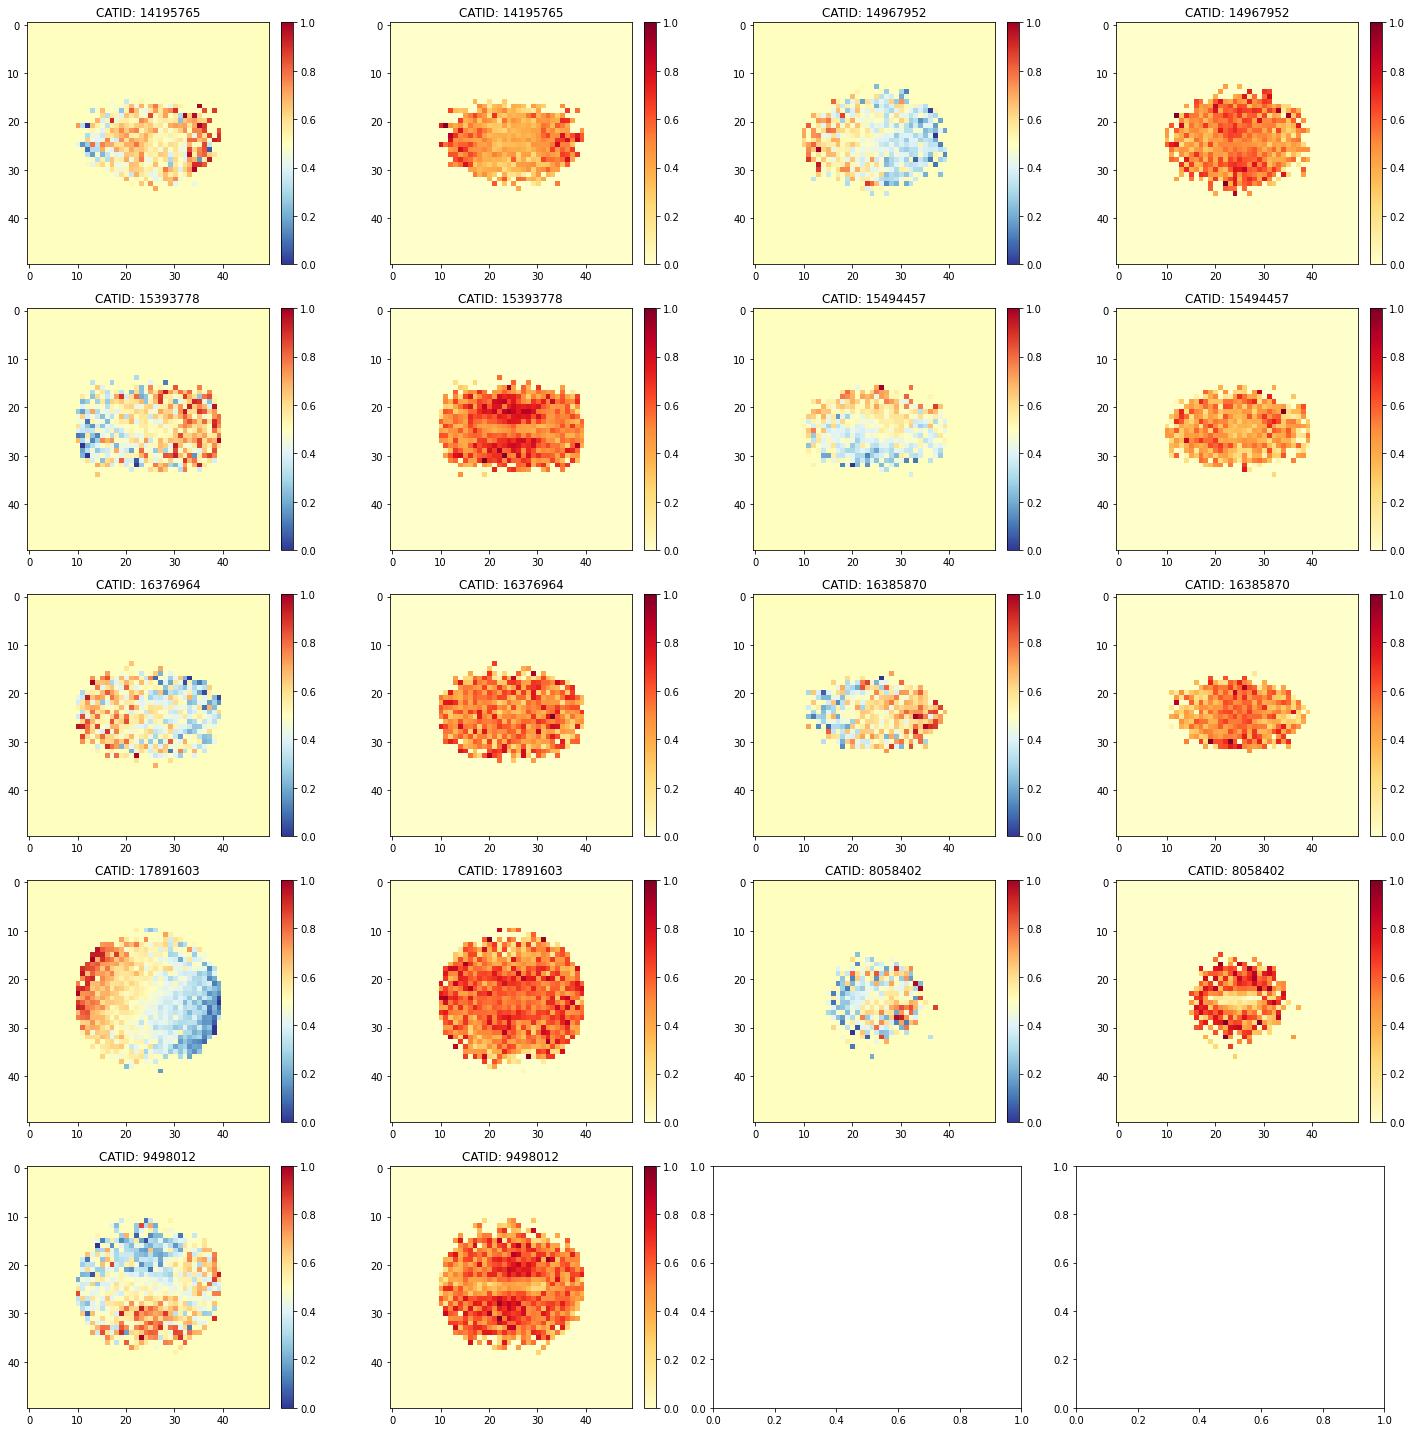

In [ ]:
catids_use = eagle_ID_UNK3
x = np.size(catids_use)
x4 = int(np.floor(x/2))
# pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')

fig, axs = plt.subplots(x4+1, 4, figsize = (20, 20))

for i in range(0,x):
  catid = catids_use[i]
  idx = np.where(eagle_IDs == catid)[0][0]
  velmap = eagle_maps[idx, :, :, 0]
  sigmap = eagle_maps[idx, :, :, 1]
  
  # if i == (x4*2):
  #   break

  if i%2 == 0:
    ii = int(i/2)
    # print(ii)
    a = axs[ii, 0].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 0], fraction=0.046, pad=0.04)
    axs[ii, 0].set_title('CATID: ' + str(catid))

    b = axs[ii, 1].imshow(sigmap, cmap='YlOrRd')
    fig.colorbar(b, ax=axs[ii, 1], fraction=0.046, pad=0.04)
    axs[ii, 1].set_title('CATID: ' + str(catid))
  

  else:
    ii = int((i-1)/2)
    # print(ii)
    a = axs[ii, 2].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 2], fraction=0.046, pad=0.04)
    axs[ii, 2].set_title('CATID: ' + str(catid))

    b = axs[ii, 3].imshow(sigmap, cmap='YlOrRd')
    axs[ii, 3].set_title('CATID: ' + str(catid))
    fig.colorbar(b, ax=axs[ii, 3], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [ ]:
# fig = plt.figure()

# columns = 9
# rows = 9
# fi = 0
# pixelsize = 0.5
    
# fig, ax_array = plt.subplots(rows, columns,squeeze=False,figsize=(20,20))
# for i,ax_row in enumerate(ax_array):
#     for j,axes in enumerate(ax_row):
#         #axes.set_title('{},{}'.format(i,j))
#         #axes.set_yticklabels([])
#         #axes.set_xticklabels([])
 
#         if fi%3 == 0:
#             file = files[fi]
#             stelkin = read_eagle(file)

#             axes.tick_params(direction='in')

#             # Create image in pixels
#             val = np.squeeze(stelkin[2,:,:])
#         if fi%3 == 1:
#             val = np.squeeze(stelkin[0,:,:])
#         if fi%3 == 2:
#             val = np.squeeze(stelkin[1,:,:])

#         vmin = np.nanmin(val)        
#         vmax = np.nanmax(val)
#         # Create image in pixels
#         xmin = (len(val[0,:])-len(val[0,:])/2) * pixelsize * -1
#         xmax = ((len(val[0,:])/2) * pixelsize)
#         ymin = (len(val[:,0])-len(val[:,0])/2) * pixelsize * -1
#         ymax = ((len(val[:,0])/2) * pixelsize)
#         image = val

#         cmap_array = ['inferno','RdYlBu_r','YlOrRd']
#         tmp = axes.imshow(image, cmap=cmap_array[fi%3], interpolation=None, vmin=vmin, vmax=vmax, \
#                 extent=[xmin-pixelsize/2, xmax+pixelsize/2, ymin-pixelsize/2, ymax+pixelsize/2] )
        
#         fi += 1
        
# plt.savefig(figdir+'jvds_eagle_sim_maps.pdf', bbox_inches='tight', pad_inches=0.3)
        
# plt.show()

In [ ]:
n_mc_run = 500
med_prob_thres = 0.65

y_pred_logits_list = [bcnn(eagle_maps) for _ in range(n_mc_run)]  # a list of predicted logits
y_pred_prob_all = np.concatenate([tf.nn.softmax(y, axis=-1)[:, :, np.newaxis] for y in y_pred_logits_list], axis=-1)
y_pred = [[int(np.median(y) >= med_prob_thres) for y in y_pred_prob] for y_pred_prob in y_pred_prob_all]
y_pred = np.array(y_pred)

idx_valid = [any(y) for y in y_pred]
print('Number of recognizable samples:', sum(idx_valid))

idx_invalid = [not any(y) for y in y_pred]
print('Number of unrecognizable samples:', sum(idx_invalid))

prop = sum(idx_valid)/ (sum(idx_valid) + sum(idx_invalid))
print('Proportion of recognizable samples:', prop)

Number of recognizable samples: 2658
Number of unrecognizable samples: 506
Proportion of recognizable samples: 0.8400758533501896


In [ ]:
698+883

1581

In [ ]:
eagle_NORs = []
eagle_ORs = []

eagle_class1 = []
eagle_class2 = []

nor16s = []
or16s = []

for i in range(0, np.shape(y_pred)[0]):
  eagle_NOR = np.median(y_pred_prob_all[i][0])
  eagle_OR = np.median(y_pred_prob_all[i][1])

  min16NOR = np.percentile(y_pred_prob_all[i][0], 16)
  min16OR = np.percentile(y_pred_prob_all[i][1], 16)

  nor16s.append(min16NOR)
  or16s.append(min16OR)

  # if eagle_NOR > 0.75:
  #   eagle_class2.append(0)
  # elif eagle_OR > 0.75:
  #   eagle_class2.append(1)
  # else:
  #   eagle_class2.append(2)

  if min16OR > 0.45:
    eagle_class1.append(1)
  elif min16NOR > 0.45:
    eagle_class1.append(0)
  else:
    eagle_class1.append(2)

  eagle_NORs.append(eagle_NOR)
  eagle_ORs.append(eagle_OR)


eagle_NORs = np.array(eagle_NORs)
eagle_ORs = np.array(eagle_ORs)
nor16s = np.array(nor16s)
or16s = np.array(or16s)
eagle_class1 = np.array(eagle_class1)
eagle_class2 = np.array(eagle_class2)

In [ ]:
eagle_ORs[0:30]

array([0.52365804, 0.7479037 , 0.98674464, 0.24019146, 0.329022  ,
       0.77745223, 0.9802694 , 0.4883027 , 0.9000248 , 0.9965933 ,
       0.9999477 , 0.4453283 , 0.9445529 , 0.61422753, 0.9878359 ,
       0.99070126, 0.7570102 , 0.59531045, 0.77253443, 0.53483474,
       0.9340441 , 0.9269444 , 0.98659766, 0.99525857, 0.8478304 ,
       0.50259423, 0.733711  , 0.34605676, 0.555148  , 0.45540726],
      dtype=float32)

In [ ]:
eagle_NORs[0:30]

array([4.7634190e-01, 2.5209624e-01, 1.3255314e-02, 7.5980854e-01,
       6.7097801e-01, 2.2254777e-01, 1.9730600e-02, 5.1169729e-01,
       9.9975258e-02, 3.4066904e-03, 5.2266238e-05, 5.5467170e-01,
       5.5447131e-02, 3.8577250e-01, 1.2164149e-02, 9.2987195e-03,
       2.4298984e-01, 4.0468949e-01, 2.2746556e-01, 4.6516526e-01,
       6.5955937e-02, 7.3055580e-02, 1.3402378e-02, 4.7414331e-03,
       1.5216954e-01, 4.9740577e-01, 2.6628906e-01, 6.5394324e-01,
       4.4485196e-01, 5.4459274e-01], dtype=float32)

In [ ]:
eagle_class1[0:30]

array([2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 2])

In [ ]:
path

'/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

In [ ]:
op1 = np.save(path + 'eagle_3map16p45.npy', eagle_class1)
# op2 = np.save(path + 'eagle_2map75n.npy', eagle_class2)

op1 = np.save(path + 'eagle_OR_0510_2.npy', eagle_ORs)
op2 = np.save(path + 'eagle_NOR_0510_2.npy', eagle_NORs)

(array([ 687.,    0.,    0.,    0.,    0., 2201.,    0.,    0.,    0.,
         276.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

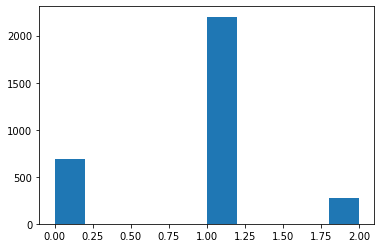

In [ ]:
plt.hist(eagle_class1)

In [ ]:
eagle_3map16p = np.load(path + 'eagle_3map16p50.npy')
eagle_3map75n = np.load(path + 'eagle_3map75n.npy')


(array([ 339.,    0.,    0.,    0.,    0., 1986.,    0.,    0.,    0.,
         839.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

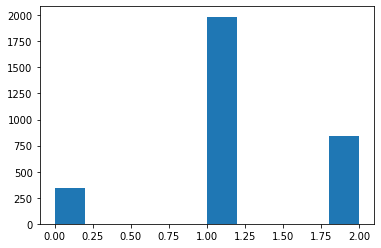

In [ ]:
plt.hist(eagle_3map75n)

(array([ 166.,    0.,    0.,    0.,    0., 2762.,    0.,    0.,    0.,
         236.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

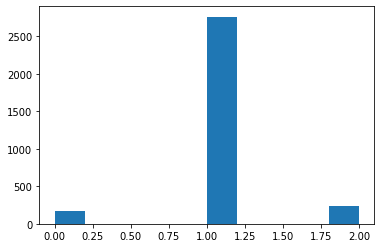

In [ ]:
plt.hist(eagle_class1)

(array([ 166.,    0.,    0.,    0.,    0., 2762.,    0.,    0.,    0.,
         236.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

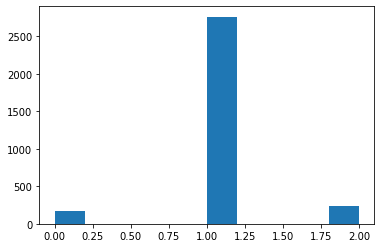

In [ ]:
plt.hist(eagle_class1)

In [ ]:
np.shape(eagle_class1)

(1581,)

(array([226.,   0.,   0.,   0.,   0., 936.,   0.,   0.,   0., 419.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

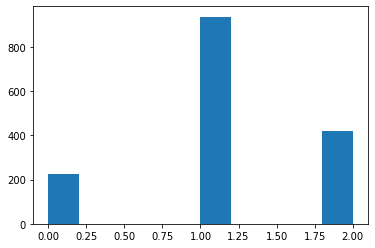

In [ ]:
plt.hist(eagle_class1)

In [ ]:
path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
eagle_NORsave = np.save(path + 'eagle_NOR_300921_1.npy', eagle_NORs)
eagle_ORsave = np.save(path + 'eagle_OR_300921_1.npy', eagle_ORs)
eagle_classsave = np.save(path + 'eagle_class_300921_1.npy', eagle_class1)

Median: 0.5929986
16th: 0.4826013696193695


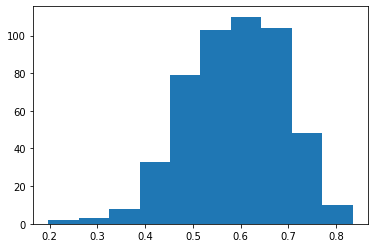

In [ ]:
n = 20
plt.hist(y_pred_prob_all[n][1])
x = y_pred_prob_all[n][1]
print('Median: ' + str(np.median(x)))
print('16th: ' + str(np.percentile(x, 16)))

In [ ]:
count = 0
for i in range(0, np.size(eagle_class)):
  if eagle_NORs[i] > eagle_ORs

# Random Stuff

In [ ]:
for a in range(0, 5):
  class_nmr = 2
  fig, axs = plt.subplots(1,2, figsize = (8, 12) )
  ab = axs[0].imshow(eagle_maps[a, :, :, 0], cmap='RdYlBu_r')
  axs[0].set_title('Velocity Map')
  fig.colorbar(ab, ax = axs[0],fraction=0.046, pad=0.04)
  ac = axs[1].imshow(eagle_maps[a, :, :, 1], cmap='YlOrRd')
  axs[1].set_title('Dispersion Map')
  fig.colorbar(ac, ax = axs[1],fraction=0.046, pad=0.04)
  plt.tight_layout()

  fig.suptitle('EAGLE ID: ' + str(eagle_catid[a]))

  # print("True label of the test sample {}: {}".format(a, np.argmax(Y_val[a], axis=-1)))

  plot_pred_hist(y_pred_prob_all[a], class_nmr, n_mc_run, med_prob_thres=med_prob_thres)

In [ ]:
def plot_pred_hist(y_pred, n_class, n_mc_run, n_bins=6, med_prob_thres=0.2, n_subplot_rows=2, figsize=(18, 8)):
    # bins = np.logspace(-2, 0, n_bins+1)
    bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    classes = ['NOR'] 
    fig, ax = plt.subplots(n_subplot_rows, n_class // n_subplot_rows + 1, figsize=figsize)
    for i in range(n_subplot_rows):
        for j in range(n_class // n_subplot_rows + 1):
            idx = i * (n_class // n_subplot_rows + 1) + j
            if idx < n_class:
                ax[i, j].hist(y_pred[idx], bins)
                # ax[i, j].set_xscale('log')
                ax[i, j].set_ylim([0, n_mc_run])
                ax[i, j].title.set_text("{} (median probability: {:.2f}) ({})".format(str(idx),
                np.median(y_pred[idx]),
                str(np.median(y_pred[idx]) >= med_prob_thres)))            
            else:
                ax[i, j].axis('off')
    plt.show()

In [ ]:
bcnn_test = bcnn_classes
OR_probs_test = OR_probs
NOR_probs_test = NOR_probs
catids_test = catids
bcnn_stds_test = bcnn_stds

In [ ]:
bcnn_test_unlabelled = bcnn_classes_unlabelled
OR_probs_test_unlabelled = OR_probs_unlabelled
NOR_probs_test_unlabelled = NOR_probs_unlabelled
catids_test_unlabelled = catids_unlabelled
bcnn_stds_test_unlabelled = bcnn_stds_unlabelled

In [ ]:
bcnn_test_1 = bcnn_test
OR_probs_test_1 = OR_probs_test
NOR_probs_test_1 = NOR_probs_test
catids_test_1 = catids_test

In [ ]:
bcnn_test_unlabelled = np.array(bcnn_test_unlabelled)
OR_probs_test_unlabelled = np.array(OR_probs_test_unlabelled)
NOR_probs_test_unlabelled = np.array(NOR_probs_test_unlabelled)
catids_test_unlabelled = np.array(catids_test_unlabelled)
bcnn_stds_test_unlabelled = np.array(bcnn_stds_test_unlabelled)

In [ ]:
bcnn_test = np.array(bcnn_test)
OR_probs_test = np.array(OR_probs_test)
NOR_probs_test = np.array(NOR_probs_test)
catids_test = np.array(catids_test)
bcnn_stds_test = np.array(bcnn_stds_test)

In [ ]:
OR_44 = []
NOR_44 = []
catids_44 = []
bcnn_44 = []
std_44 = []

for val in catids_test_unlabelled:
  if val in catids_44:
    continue
  else:
    catids_44.append(val)
  idx = []
  
  #look for locations where the string matches
  for a in range(0, np.size(catids_test_unlabelled)):
    if catids_test_unlabelled[a] == val:
      idx.append(a)
  
  idx = np.array(idx)

  bcnn_0 = bcnn_test_unlabelled[idx]
  OR_0 = OR_probs_test_unlabelled[idx]
  NOR_0 = NOR_probs_test_unlabelled[idx]
  std_0 = bcnn_stds_test_unlabelled[idx]

  new_OR = np.mean(OR_0)
  OR_44.append(new_OR)

  new_NOR = np.mean(NOR_0)
  NOR_44.append(new_NOR)

  new_std = np.mean(std_0)
  std_44.append(new_std)


  if new_OR > 0.5:
    new_bcnn = 1
  else:
    new_bcnn = 0
  bcnn_44.append(new_bcnn)



In [ ]:
OR_55 = []
NOR_55 = []
catids_55 = []
bcnn_55 = []
std_55 = []

for val in catids_test:
  if val in catids_55:
    continue
  else:
    catids_55.append(val)
  idx = []
  
  #look for locations where the string matches
  for a in range(0, np.size(catids_test)):
    if catids_test[a] == val:
      idx.append(a)
  
  idx = np.array(idx)

  bcnn_0 = bcnn_test[idx]
  OR_0 = OR_probs_test[idx]
  NOR_0 = NOR_probs_test[idx]
  std_0 = bcnn_stds_test[idx]

  new_OR = np.mean(OR_0)
  OR_55.append(new_OR)

  new_NOR = np.mean(NOR_0)
  NOR_55.append(new_NOR)

  new_std = np.mean(std_0)
  std_55.append(new_std)


  if new_OR > 0.5:
    new_bcnn = 1
  else:
    new_bcnn = 0
  bcnn_55.append(new_bcnn)


In [ ]:
np.shape(OR_55)

(490,)

In [ ]:
np.shape(OR_55)[0] + np.shape(OR_44)[0]

3429

In [ ]:
path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

In [ ]:
OR_1 = np.save(path + 'OR_prob_sig_new_unlabelled2107', OR_44)
NOR_1 = np.save(path + 'NOR_prob_sig_new_unlabelled2107', NOR_44)
catids_1 = np.save(path + 'catids_sig_new_unlabelled2107', catids_44)
bcnn_1 = np.save(path + 'bcnn_class_sig_new_unlabelled2107', bcnn_44)
std_1 = np.save(path + 'bcnn_class_sig_new_unlabelled2107', std_44)

In [ ]:
OR_2 = np.save(path + 'OR_prob_sig_2107', OR_55)
NOR_2 = np.save(path + 'NOR_prob_sig_2107', NOR_55)
catids_2 = np.save(path + 'catids_sig_2107', catids_55)
bcnn_2 = np.save(path + 'bcnn_class_sig_2107', bcnn_55)
std_2 = np.save(path + 'bcnn_class_sig_2107', std_55)

In [ ]:
OR_2 = np.load(path + 'OR_prob_sig_new_unlabelled1.npy')
NOR_2 = np.load(path + 'NOR_prob_sig_new_unlabelled1.npy')
catids_2 = np.load(path + 'catids_sig_new_unlabelled1.npy')
bcnn_2 = np.load(path + 'bcnn_class_sig_new_unlabelled1.npy')

In [ ]:
OR_1 = np.load(path + 'OR_prob_sig_new_labelled1.npy')
NOR_1 = np.load(path + 'NOR_prob_sig_new_labelled1.npy')
catids_1 = np.load(path + 'catids_sig_new_labelled1.npy')
bcnn_1 = np.load(path + 'bcnn_class_sig_new_labelled1.npy')

In [ ]:
# OR_21 = np.load(path + 'OR_prob_vel_unlabelled3.npy')
# NOR_21 = np.load(path + 'NOR_prob_vel_unlabelled3.npy')
# catids_21 = np.load(path + 'catids_vel_unlabelled3.npy')
# bcnn_21 = np.load(path + 'bcnn_class_vel_unlabelled3.npy')

In [ ]:
# OR_19 = np.load(path + 'OR_prob_sig_unlabelled3.npy')
# NOR_19 = np.load(path + 'NOR_prob_sig_unlabelled3.npy')
# catids_19 = np.load(path + 'catids_sig_unlabelled3.npy')
# bcnn_19 = np.load(path + 'bcnn_class_sig_unlabelled3.npy')

In [ ]:
OR_13 = np.load(path + 'OR_prob_disp.npy')
NOR_13 = np.load(path + 'NOR_prob_disp.npy')
catids_13 = np.load(path + 'catids_disp.npy')
bcnn_13 = np.load(path + 'bcnn_class_disp.npy')

In [ ]:
catids_10 = []
for i in range(0, np.size(catids_1)):
  val = catids_1[i]
  val = int(val)
  catids_10.append(val)

catids_10 = np.array(catids_10)

In [ ]:
OR_14 = np.load(path + 'OR_prob_vel.npy')
NOR_14 = np.load(path + 'NOR_prob_vel.npy')
catids_14 = np.load(path + 'catids_vel.npy')
bcnn_14 = np.load(path + 'bcnn_class_vel.npy')

In [ ]:
catids_140 = []
for i in range(0, np.size(catids_14)):
  val = catids_14[i]
  val = int(val)
  catids_140.append(val)

In [ ]:
np.shape(catids_140)

(538,)

In [ ]:
catids_21

In [ ]:
OR_18 = np.load(path + 'OR_prob_vel_unlabelled.npy')
NOR_18 = np.load(path + 'NOR_prob_vel_unlabelled.npy')
# catids_18 = np.load(path + 'catids_vel_unlabelled.npy')
bcnn_18 = np.load(path + 'bcnn_class_vel_unlabelled.npy')

In [ ]:
catids_180 = []
for i in range(0, np.size(catids_18)):
  val = catids_18[i]
  val = int(val)
  catids_180.append(val)

In [ ]:
OR_17 = np.load(path + 'OR_prob_disp_unlabelled.npy')
NOR_17 = np.load(path + 'NOR_prob_disp_unlabelled.npy')
catids_17 = np.load(path + 'catids_disp_unlabelled.npy')
bcnn_17 = np.load(path + 'bcnn_class_disp_unlabelled.npy')

In [ ]:
np.shape(catids_19)

()

In [ ]:
catids_disp = np.concatenate((catids_55, catids_44), axis = 0 )
OR_disp_total = np.concatenate((OR_55, OR_44),axis = 0 )
NOR_disp_total = np.concatenate((NOR_55, NOR_44),axis = 0 )
class_disp = np.concatenate((bcnn_55, bcnn_44),axis = 0 )
std_total = np.concatenate((std_55, std_44),axis = 0 )

In [ ]:
# catids_vel = np.concatenate((catids_140, catids_21),axis = 0 )
# OR_vel_total = np.concatenate((OR_14, OR_21),axis = 0 )
# NOR_vel_total = np.concatenate((NOR_14, NOR_21),axis = 0 )
# class_vel = np.concatenate((bcnn_14, bcnn_21),axis = 0 )

In [ ]:
np.shape(catids_disp)

(3429,)

In [ ]:
np.shape(np.unique(catids_disp))

(3429,)

In [ ]:
catids_disp[0]

301937

In [ ]:
np.shape(OR_vel_total)

(3429,)

In [ ]:
catids_vel2 = []
for i in range(0, np.size(catids_vel)):
  val = catids_vel[i]
  val = int(val)
  catids_vel2.append(val)

catids_disp2 = []
for i in range(0, np.size(catids_disp)):
  val = catids_disp[i]
  val = int(val)
  catids_disp2.append(val)

In [ ]:
new_val = 209613

In [ ]:
catids_disp = np.append(catids_disp, new_val)
OR_disp_total = np.append(OR_disp_total , np.NaN)
NOR_disp_total = np.append(NOR_disp_total , np.NaN)
class_disp = np.append(class_disp , np.NaN)
std_total = np.append(std_total, np.NaN)

In [ ]:
catids_vel = np.append(catids_vel, new_val)
OR_vel_total = np.append(OR_vel_total , np.NaN)
NOR_vel_total = np.append(NOR_vel_total , np.NaN)
class_vel = np.append(class_vel , np.NaN)

In [ ]:
catids_disp2 = np.array(catids_disp)
catids_vel2 = np.array(catids_vel)

In [ ]:
print(np.shape(catids_disp))
print(np.shape(OR_disp_total))
print(np.shape(NOR_disp_total))
print(np.shape(class_disp))
print(np.shape(std_total))

(3430,)
(3430,)
(3430,)
(3430,)
(3430,)


In [ ]:
order = np.load(path + 'CATID_EXT_order.npy')
df2 = pd.DataFrame({'CATID_EXT' : catids_disp ,'DISP_CLASS': class_disp, 'STD': std_total, 'DISP_OR_PROB': OR_disp_total, 'DISP_NOR_PROB':NOR_disp_total})

df2 = df2.sort_values('CATID_EXT')
df2 = df2.reset_index()
df2 = df2.drop(columns=['index'])
# df2['CATID'].counts()
df2['ORDER'] = order
df2 = df2.sort_values(['ORDER'])
df2 = df2.reset_index()
df2 = df2.drop(columns= ['index', 'ORDER'])
df2


,CATID_EXT,DISP_CLASS,STD,DISP_OR_PROB,DISP_NOR_PROB
0,6821,1.0,0.002177,0.998134,0.001865
1,6837,1.0,0.110861,0.637462,0.362538
2,7139,1.0,0.092966,0.709470,0.290530
3,7206,1.0,0.085882,0.657919,0.342081
4,7289,0.0,0.055666,0.277740,0.722260
...,...,...,...,...,...
3425,9403801268,0.0,0.125121,0.488359,0.511641
3426,9403801272,0.0,0.028635,0.001964,0.998036
3427,9403801281,0.0,0.193310,0.220599,0.779401
3428,9403801368,0.0,0.160125,0.116863,0.883137


In [ ]:
path

'/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

In [ ]:
order = np.load(path + 'CATID_EXT_order.npy')

In [ ]:
disp_check = df2['DISP_CLASS']

In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
# cat = Table.read(path + 'bcnn_kinematics_r2.fits', hdu = 1)

In [ ]:
# df = pd.DataFrame({'CATID_EXT' : catids_ ,'VEL_CLASS': class_vel,'VEL_OR_PROB': OR_vel_total, 'VEL_NOR_PROB':NOR_vel_total})

# df = df.sort_values('CATID_EXT')
# df = df.reset_index()
# df = df.drop(columns=['index'])
# df['ORDER'] = order

In [ ]:
# catid = df['CATID'].values
disp_class = df2['DISP_CLASS'].values
disp_OR_prob = df2['DISP_OR_PROB'].values
disp_NOR_prob = df2['DISP_NOR_PROB'].values
disp_std = df2['STD'].values

In [ ]:
df2.to_csv('/content/drive/MyDrive/KIN_TRAINING_DATASETS/' + 'new_sorted070621.csv', index=False)

In [ ]:
table2 = path2 + 'jvds_mean_sn_cat_v012_mge_v260521.fits'
cat2 = Table.read(table2, hdu = 1)

In [ ]:
cat2

CATID,GAL_FILES_CBR,NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN
int64,bytes78,float32,float32,float32,float32,float32,float32,float32
6821,6821_blue_red_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16.fits.gz,138.0,nan,nan,19.928036,20.06546,16.423527,15.730701
6837,6837_blue_red_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16.fits.gz,1.0,nan,nan,5.7501817,5.6229954,nan,nan
7139,7139_blue_red_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,21.0,nan,nan,12.550486,10.060651,30.75142,31.078266
7206,7206_blue_red_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,13.0,nan,nan,12.71258,11.261566,14.172637,12.848637
7289,7289_blue_red_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,44.0,nan,nan,19.569178,17.072329,20.403473,17.815428
7715,7715_blue_red_7_Y14SAR4_P002_12T064_2014_05_23-2014_06_01.fits.gz,42.0,nan,nan,18.445578,16.479822,16.04253,12.826338
7839,7839_blue_red_7_Y16SAR4_P002_12T101_2017_04_19-2017_05_01.fits.gz,120.0,nan,nan,31.101288,28.047785,22.69118,19.649641
7841,7841_blue_red_7_Y14SAR4_P002_12T064_2014_05_23-2014_06_01.fits.gz,58.0,nan,nan,22.187939,20.054993,32.067795,32.316216
7946,7946_blue_red_7_Y16SAR4_P002_12T101_2017_04_19-2017_05_01.fits.gz,27.0,nan,nan,16.040407,14.083519,19.93737,17.456738


In [ ]:
cat2.remove_columns(['CATID', 'GAL_FILES_CBR'])

In [ ]:
cat2

NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN
float32,float32,float32,float32,float32,float32,float32
138.0,nan,nan,19.928036,20.06546,16.423527,15.730701
1.0,nan,nan,5.7501817,5.6229954,nan,nan
21.0,nan,nan,12.550486,10.060651,30.75142,31.078266
13.0,nan,nan,12.71258,11.261566,14.172637,12.848637
44.0,nan,nan,19.569178,17.072329,20.403473,17.815428
42.0,nan,nan,18.445578,16.479822,16.04253,12.826338
120.0,nan,nan,31.101288,28.047785,22.69118,19.649641
58.0,nan,nan,22.187939,20.054993,32.067795,32.316216
27.0,nan,nan,16.040407,14.083519,19.93737,17.456738


In [ ]:
t3 = Table([disp_class, disp_OR_prob,  disp_NOR_prob, disp_std], 
          names=( 'BCNN_CLASS','OR_PROB', 'NOR_PROB', 'BCNN_STD'))


In [ ]:
cat2['BCNN_CLASS'] = disp_class
cat2['OR_PROB'] = disp_OR_prob
cat2['NOR_PROB'] = disp_NOR_prob
cat2['BCNN_STD'] = disp_std

In [ ]:
cat2

NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN,BCNN_CLASS,OR_PROB,NOR_PROB,BCNN_STD
float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64
138.0,nan,nan,19.928036,20.06546,16.423527,15.730701,1.0,0.9981344938278198,0.0018654561135917902,0.002177418675273657
1.0,nan,nan,5.7501817,5.6229954,nan,nan,1.0,0.6374621391296387,0.36253783106803894,0.11086080223321915
21.0,nan,nan,12.550486,10.060651,30.75142,31.078266,1.0,0.7094697952270508,0.290530264377594,0.0929659977555275
13.0,nan,nan,12.71258,11.261566,14.172637,12.848637,1.0,0.6579186320304871,0.34208133816719055,0.08588173985481262
44.0,nan,nan,19.569178,17.072329,20.403473,17.815428,0.0,0.27774032950401306,0.7222596406936646,0.055666178464889526
42.0,nan,nan,18.445578,16.479822,16.04253,12.826338,0.0,nan,nan,nan
120.0,nan,nan,31.101288,28.047785,22.69118,19.649641,0.0,0.5,0.5,4.403201183755729e-17
58.0,nan,nan,22.187939,20.054993,32.067795,32.316216,0.0,nan,nan,nan
27.0,nan,nan,16.040407,14.083519,19.93737,17.456738,1.0,0.9999786615371704,2.1365467546274886e-05,2.3793163563823327e-05


In [ ]:
table1 = path2 + 'jvds_stelkin_cat_v012_mge_seecorr_kh20_v150121_private-Copy1.fits'
cat = Table.read(table1, hdu = 1)

# table2 = path + 'jvds_mean_sn_cat_v012_mge_v260521.fits'
# cat2 = Table.read(table2, hdu = 1)

# KIN_MTYPE = cat.field("KIN_MTYPE")
# cat = cat[np.where(KIN_MTYPE < 4)] 

# KIN_MTYPE = cat.field("KIN_MTYPE")
# kin_bin = np.where(KIN_MTYPE < 1.5, 0, 1)

In [ ]:
r2 = cat2.write(path2 +'bcnn_10.fits', format='fits')

In [ ]:
a_1 = fits.open(path2 + 'bcnn_10.fits')
b_1 = fits.open(path2 + 'jvds_stelkin_cat_v012_mge_seecorr_kh20_v150121_private-Copy1.fits')
new_columns_2 = b_1[1].columns + a_1[1].columns 
new_hdu3 = fits.BinTableHDU.from_columns(new_columns_2)

In [ ]:
cat3 = Table.read(new_hdu3, hdu = 1)

In [ ]:
cat3

CATID,CATID_EXT,SAMI_FILENAME,OBS_DATE,RA,DEC,LMSTAR,Z_SPEC,Z_TONRY,GMINUSI,MU_AT_RE,GAL_FLAG,HWHM_PSF,RE,RE_CIRC_KPC,ELLIP,N_SERSIC,MTYPE,KIN_MTYPE,ENV_DIST_TO_5NN,ENV_SURFDENS,E_ENV_SURFDENS,SAMI_ISO,SAMI_CENTRAL,SAMI_SAT,HALOMASS,HALOMASS_UNIQUE,GROUP_ID,HALOMASS_WEIGHT,PA_PHOT,PA_STELKIN,E_PA_STELKIN,PA_GASKIN,E_PA_GASKIN,RMAX_VSIGMA,SIGMA_RE,E_SIGMA_RE,VRMS_RE,E_VRMS_RE,APER_CORR_FLAG,RMAX_APER_CORR,LAMBDAR_RE,E_LAMBDAR_RE,LAMBDAR_MAX,E_LAMBDAR_MAX,LAMBDAR_RE_EO,E_LAMBDAR_RE_EO,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,EVSIGMA_MAX,VSIGMA_RE_EO,E_VSIGMA_RE_EO,MEAN_K51_RE,E_MEAN_K51_RE,FR_EE11,SR_EE11,FR_MC16,SR_MC16,FR_JVDS20,SR_JVDS20,PFR_JVDS20,PSR_JVDS20,INTRINSIC_ELLIP,INCLINATION,LR_SEEING_CORRECTION,VS_SEEING_CORRECTION,HIGH_ORDER_CLASS,NSPAXELS_SNGT20,MEAN_SN,MEDIAN_SN,CIRC_6ARC_MEAN_SN,CIRC_6ARC_MEDIAN_SN,RE_MEAN_SN,RE_MEDIAN_SN,BCNN_CLASS,OR_PROB,NOR_PROB,BCNN_STD
int64,int64,str69,str21,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64
6821,6821,6821_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,174.15315,0.815855,7.42,0.00375,0.00443,-0.01,23.51,3.0,1.4091473,6.849334,0.41975373,0.37479904,7.2232,3.0,6.0,nan,nan,nan,1.0,nan,nan,nan,nan,nan,1.0,134.77594,nan,nan,344.0,0.16666667,1.6666667,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,138.0,nan,nan,19.928036,20.06546,16.423527,15.730701,1.0,0.9981344938278198,0.0018654561135917902,0.002177418675273657
6837,6837,6837_7_Y18SAR4_P001_12T126_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,174.30278,0.7899846,9.0,0.0742,0.0742,9.999,9.999,8.0,1.4091473,nan,nan,nan,nan,3.0,6.0,1.384,nan,nan,nan,1.0,nan,257753714284.17548,257753714284.17548,203007.0,1.0,nan,nan,nan,289.5,0.16666667,7.5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,nan,nan,5.7501817,5.6229954,nan,nan,1.0,0.6374621391296387,0.36253783106803894,0.11086080223321915
7139,7139,7139_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,175.82831,0.747881,10.63,0.07567,0.07697,1.36,20.03,0.0,0.7494104,1.0257354,1.3232017,0.1923237,3.337,1.0,6.0,1.0,0.27,0.0289,nan,1.0,nan,55228194660.07442,55228194660.07442,203032.0,1.0,-90.39273,267.5,1.5,181.0,0.16666667,3.6000001,235.61281,3.229881,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.0,nan,nan,12.550486,10.060651,30.75142,31.078266,1.0,0.7094697952270508,0.290530264377594,0.0929659977555275
7206,7206,7206_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,176.1641,0.749569,10.48,0.09339,0.09471,0.91,21.78,0.0,0.7494104,3.1248665,4.540183,0.29915828,1.4784,2.0,6.0,1.0,1.138,0.4627,nan,1.0,nan,3300007829417.872,3300007829417.872,203039.0,1.0,106.22249,277.0,1.4166666,279.5,0.25,5.2,104.364845,1.8333597,103.75486,30.076302,0.0,1.0,0.65009856,0.014969519,nan,nan,0.7064621,0.016267376,0.86284924,0.023065692,nan,nan,1.0090297,0.026973391,0.034964137,0.008393184,1.0,nan,1.0,nan,1.0,nan,1.0,nan,0.8531062,46.107323,1.2044398,1.2768883,nan,13.0,nan,nan,12.71258,11.261566,14.172637,12.848637,1.0,0.6579186320304871,0.34208133816719055,0.08588173985481262
7289,7289,7289_7_Y18SAR3_P002_12T122_2018_05_07-2018_05_16.fits.gz,2018_05_07-2018_05_16,176.77502,0.635689,11.12,0.08682,0.08813,1.32,22.17,0.0,0.7494104,3.3211834,4.792

In [ ]:
path2

'/content/drive/MyDrive/FITS_FILES/'

In [ ]:
r2 = cat3.write(path2 +'bcnn_kinematics_r10.fits', format='fits')

In [ ]:
CATID_EXT = cat3.field('CATID_EXT')
cat4 = cat3[np.where(CATID_EXT == 209613)]

In [ ]:
disp_bin = cat3.field('disp_class')
vel_bin = cat3.field('vel_class')

In [ ]:
disp_correct = np.where(disp_bin == kin_bin, 1, 0)
vel_correct = np.where(vel_bin == kin_bin, 1, 0)

In [ ]:

print("Accuracy of CNN with velocity maps only: ",  100*np.round(np.sum(vel_correct)/np.size(vel_correct), 4), '%')
print("Accuracy of CNN with both maps: " ,  100*np.round(np.sum(disp_correct)/np.size(disp_correct), 4), '%')

Accuracy of CNN with velocity maps only:  80.11 %
Accuracy of CNN with both maps:  89.03 %


In [ ]:
KIN_MTYPE = cat4.field('KIN_MTYPE')
cat4 = cat4[np.where(KIN_MTYPE < 4)]

In [ ]:
KIN_MTYPE = cat4.field('KIN_MTYPE')
KIN_MTYPE = np.where(KIN_MTYPE <1.5, 0, 1)

In [ ]:
cat4.field('KIN_MTYPE_BINARY') = KIN_MTYPE

SyntaxError: ignored

In [ ]:
from astropy.table import Column

In [ ]:
cat4.add_column(, name='aa', index=0)  # Insert before first table column

In [ ]:
a = cat4.write(path +'labelled_catalogue.fits', format='fits')

In [ ]:
type(t)

astropy.table.table.Table

In [ ]:
t[0:20]

CATID,BCNN Classification,OR probability,NOR probability
str10,int64,float32,float32
599838,0,0.0035562913,0.9964437
9011900302,1,0.9980296,0.0019704178
143291,0,0.05367716,0.94632286
3631885,1,0.7670539,0.23294608
55143,0,5.0517356e-05,0.9999495
9403800159,1,0.9999826,1.743208e-05
273845,0,4.3389042e-05,0.9999566
9011900074,0,0.0019164174,0.9980836
549296,0,0.2644407,0.7355593


In [ ]:
prop_vals_total.append(prop)
print(np.shape(prop_vals_total))
prop_vals_total

(10,)


[0.9234449760765551,
 0.8899521531100478,
 0.9043062200956937,
 0.8899521531100478,
 0.8947368421052632,
 0.7703349282296651,
 0.8803827751196173,
 0.9234449760765551,
 0.7416267942583732,
 0.8516746411483254]

In [ ]:
prop_vals.append(prop)
print(np.shape(prop_vals))
prop_vals

(10,)


[0.7703349282296651,
 0.784688995215311,
 0.645933014354067,
 0.7799043062200957,
 0.7655502392344498,
 0.8277511961722488,
 0.7894736842105263,
 0.7655502392344498,
 0.7655502392344498,
 0.7751196172248804]

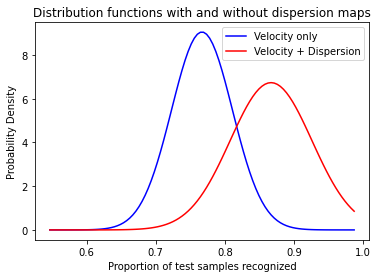

In [ ]:
import scipy.stats as stats
import math

mu = np.mean(prop_vals)
sigma = np.std(prop_vals)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'b', label = 'Velocity only')

mu2 = np.mean(prop_vals_total)
sigma2 = np.std(prop_vals_total)
x2 = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x2, mu2, sigma2), color = 'r', label = 'Velocity + Dispersion')
plt.title('Distribution functions with and without dispersion maps')
plt.ylabel('Probability Density')
plt.xlabel('Proportion of test samples recognized')
plt.legend()
# bins2 = np.arange(0.5, 1.05, 0.0125)
# plt.hist(prop_vals, bins=bins2, color = 'b')

plt.show()

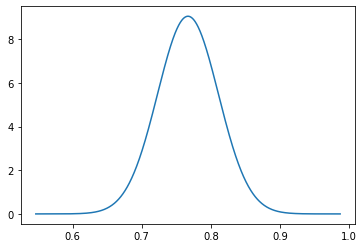

In [ ]:
mu = 0
sigma = 1
mu = np.mean(prop_vals)
sigma = np.std(prop_vals)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [ ]:
mu = np.mean(prop_vals)
print(mu)
sigma = np.std(prop_vals)
print(sigma)

0.7669856459330144
0.04406332294676667


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 4., 3., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.5   , 0.5125, 0.525 , 0.5375, 0.55  , 0.5625, 0.575 , 0.5875,
        0.6   , 0.6125, 0.625 , 0.6375, 0.65  , 0.6625, 0.675 , 0.6875,
        0.7   , 0.7125, 0.725 , 0.7375, 0.75  , 0.7625, 0.775 , 0.7875,
        0.8   , 0.8125, 0.825 , 0.8375, 0.85  , 0.8625, 0.875 , 0.8875,
        0.9   , 0.9125, 0.925 , 0.9375, 0.95  , 0.9625, 0.975 , 0.9875,
        1.    , 1.0125, 1.025 , 1.0375]),
 <a list of 43 Patch objects>)

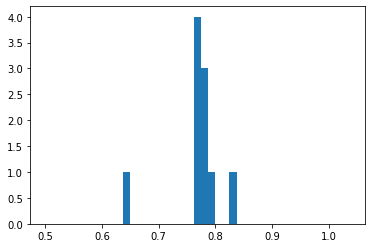

In [ ]:
bins2 = np.arange(0.5, 1.05, 0.0125)

plt.hist(prop_vals, bins=bins2)

True label of the test sample 1: 0


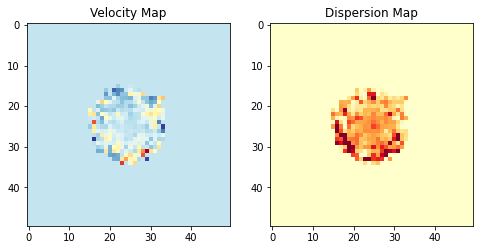

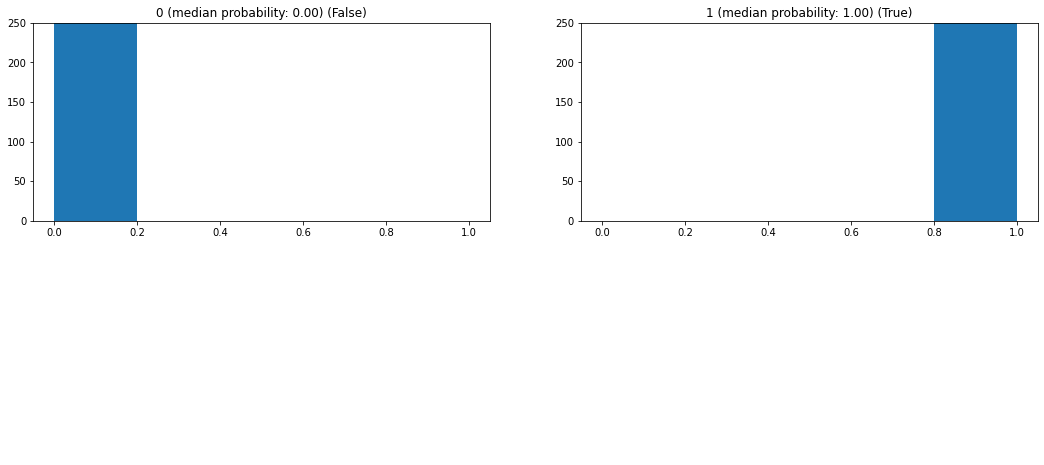

In [ ]:
a = 1
class_nmr = 2
fig, axs = plt.subplots(1,2, figsize = (8, 12) )
axs[0].imshow(X_val[a, :, :, 0], cmap='RdYlBu_r')
axs[0].set_title('Velocity Map')
axs[1].imshow(X_val[a, :, :, 1], cmap='YlOrRd')
axs[1].set_title('Dispersion Map')

print("True label of the test sample {}: {}".format(a, np.argmax(Y_val[a], axis=-1)))

plot_pred_hist(y_pred_prob_all[a], class_nmr, n_mc_run, med_prob_thres=med_prob_thres)

True label of the test sample 0: 1


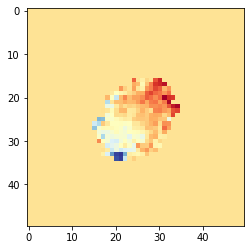

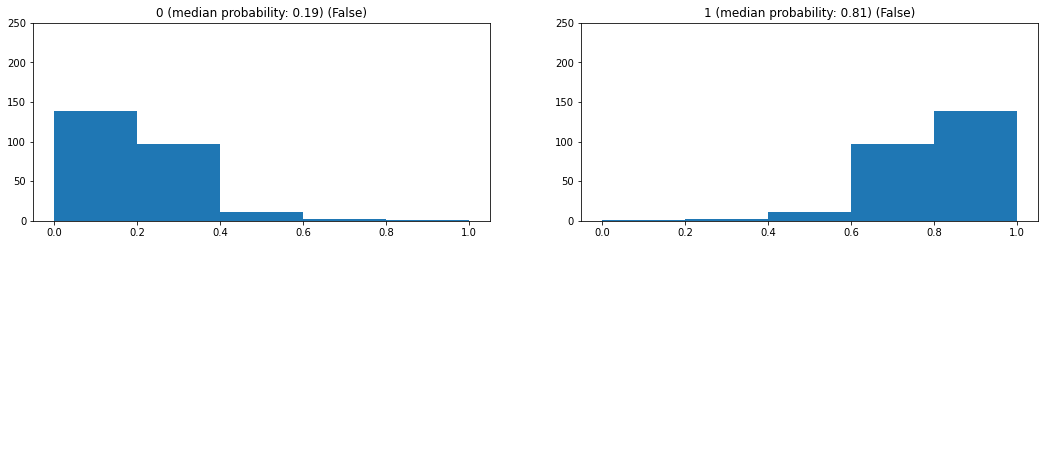

I don't know!
True label of the test sample 2: 0


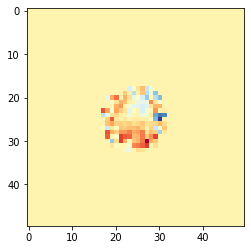

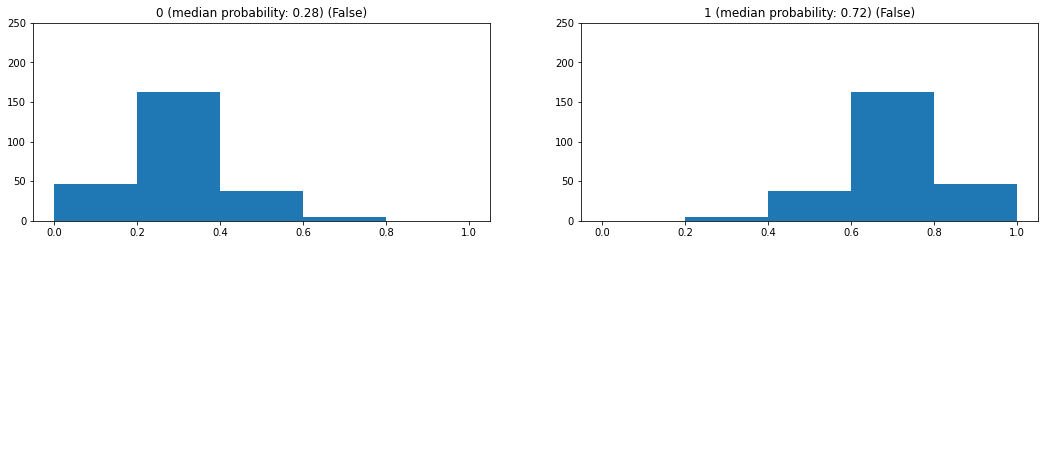

I don't know!
True label of the test sample 7: 0


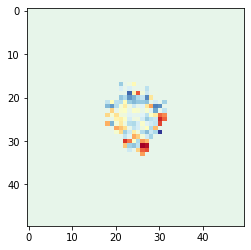

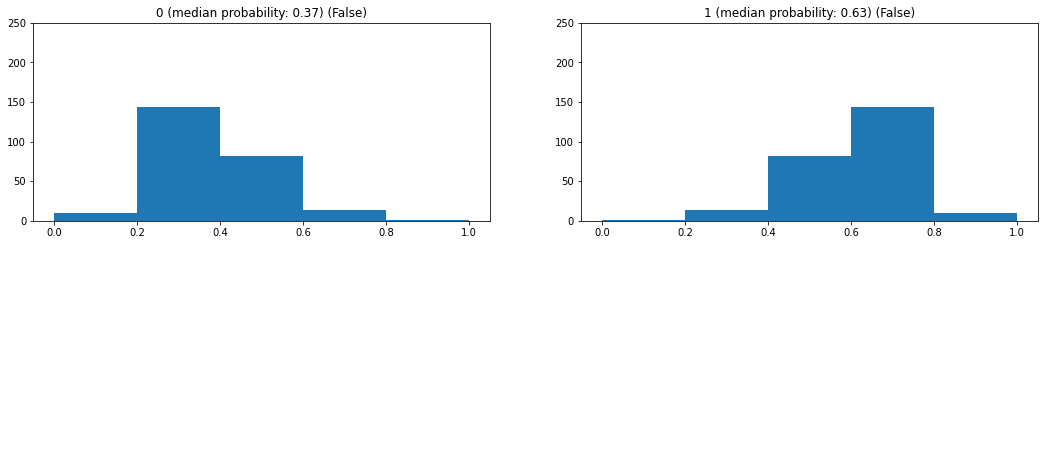

I don't know!
True label of the test sample 10: 1


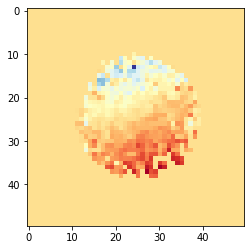

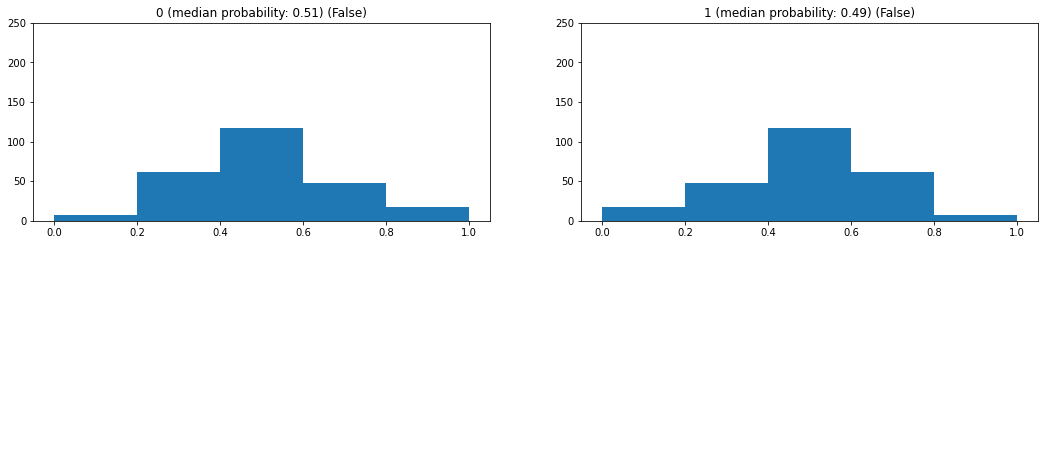

I don't know!
True label of the test sample 13: 1


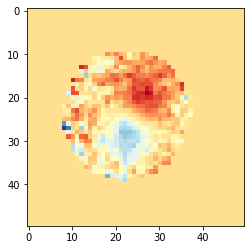

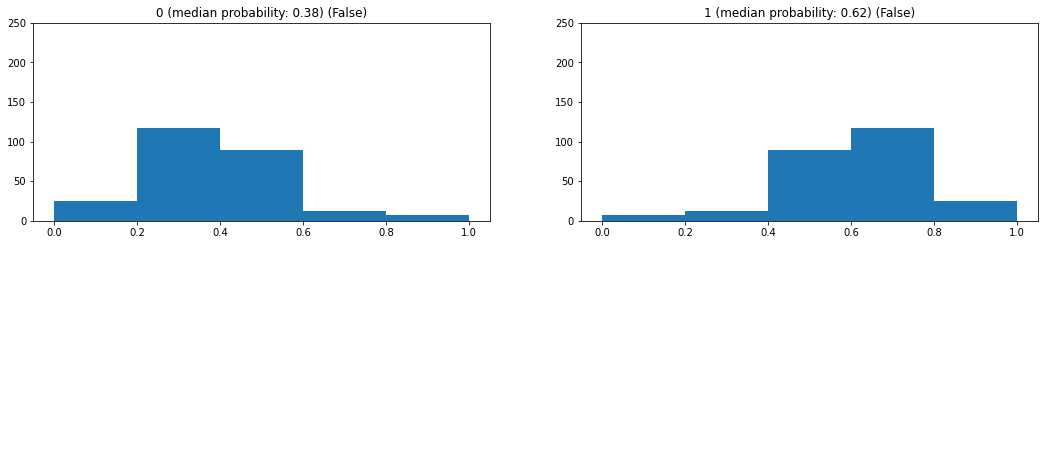

I don't know!
True label of the test sample 14: 0


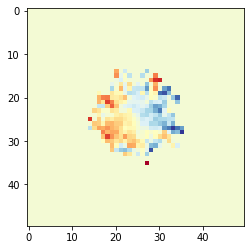

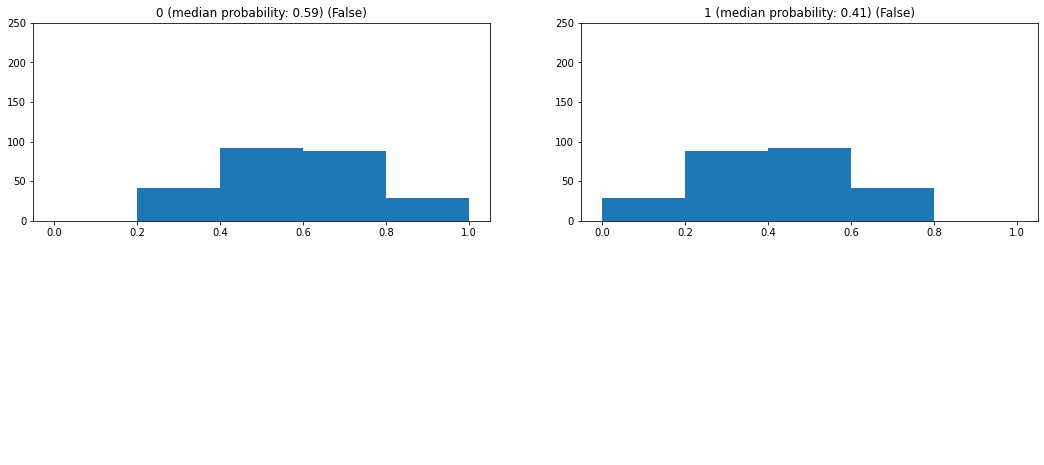

I don't know!


In [ ]:
class_nmr = 2
invalids = 0
for idx in np.where(idx_invalid)[0]:
    plt.imshow(X_val[idx, :, :, 0], cmap='RdYlBu_r')
    print("True label of the test sample {}: {}".format(idx, (Y_val[idx], axis=-1)))

    plot_pred_hist(y_pred_prob_all[idx], class_nmr, n_mc_run, med_prob_thres=med_prob_thres)

    if any(y_pred[idx]):
        print("Predicted label of the test sample {}: {}".format(idx, np.argmax(y_pred[idx], axis=-1)))
    else:
        print("I don't know!")
    invalids += 1
    if invalids > 5:
        break

In [ ]:
X1 = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/unlabelled_maps.npy')
Z1 = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/unlabelled_catids.npy')

In [ ]:
np.shape(X1)

(2472, 50, 50, 1)

In [ ]:
n_mc_run = 250
med_prob_thres = 0.9

y_pred_logits_list = [bcnn(X1) for _ in range(n_mc_run)]  # a list of predicted logits
y_pred_prob_all = np.concatenate([tf.nn.softmax(y, axis=-1)[:, :, np.newaxis] for y in y_pred_logits_list], axis=-1)
y_pred = [[int(np.median(y) >= med_prob_thres) for y in y_pred_prob] for y_pred_prob in y_pred_prob_all]
y_pred = np.array(y_pred)

idx_valid = [any(y) for y in y_pred]
print('Number of recognizable samples:', sum(idx_valid))

idx_invalid = [not any(y) for y in y_pred]
print('Unrecognizable samples:', np.where(idx_invalid)[0])

# print('Test accuracy on recognizable samples:',
#       sum(np.equal(np.argmax(Y_val[idx_valid], axis=-1), np.argmax(y_pred[idx_valid], axis=-1))) / len(Y_val[idx_valid]))

# print('Test accuracy on unrecognizable samples:',
#       sum(np.equal(np.argmax(Y_val[idx_invalid], axis=-1), np.argmax(y_pred[idx_invalid], axis=-1))) / len(Y_val[idx_invalid]))

Number of recognizable samples: 1434
Unrecognizable samples: [   1    3    4 ... 2452 2461 2464]


In [ ]:
print(sum(idx_invalid))

1038


In [ ]:
idx_valid[0:10]

[True, False, True, False, False, True, True, False, False, False]

In [ ]:
y_pred[0:10]

array([[1, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]])

In [ ]:
y_pred_prob_all[0:10]

array([[[0.9511811 , 0.93630934, 0.9813085 , ..., 0.88845754,
         0.9581133 , 0.9659612 ],
        [0.0488189 , 0.06369062, 0.01869146, ..., 0.11154243,
         0.0418867 , 0.03403876]],

       [[0.75596344, 0.76532763, 0.7090939 , ..., 0.86659265,
         0.87989384, 0.8566682 ],
        [0.24403659, 0.23467232, 0.29090613, ..., 0.1334074 ,
         0.12010618, 0.14333181]],

       [[0.03855615, 0.02294507, 0.01827969, ..., 0.01628682,
         0.01414683, 0.08696512],
        [0.96144384, 0.97705495, 0.9817203 , ..., 0.98371315,
         0.9858532 , 0.91303486]],

       ...,

       [[0.6889125 , 0.6824554 , 0.71388847, ..., 0.766096  ,
         0.7204404 , 0.6676474 ],
        [0.31108752, 0.31754455, 0.2861115 , ..., 0.23390397,
         0.27955964, 0.3323526 ]],

       [[0.83178294, 0.80902386, 0.68950784, ..., 0.88208497,
         0.8538725 , 0.92958885],
        [0.16821708, 0.19097619, 0.3104922 , ..., 0.117915  ,
         0.14612749, 0.07041112]],

       [[0.928099

In [ ]:
a = 0
class_nmr = 2
plt.imshow(X_val[a, :, :, 0], cmap='RdYlBu_r')
plt.title(Z1[a])
plot_pred_hist(y_pred_prob_all[a], class_nmr, n_mc_run, med_prob_thres=med_prob_thres)

NameError: ignored

In [ ]:
class_nmr = 2
invalids = 0
for idx in np.where(idx_invalid)[0]:
    plt.imshow(X_val[idx, :, :, 0], cmap='RdYlBu_r')
    print("True label of the test sample {}: {}".format(idx, np.argmax(Y_val[idx], axis=-1)))

    plot_pred_hist(y_pred_prob_all[idx], class_nmr, n_mc_run, med_prob_thres=med_prob_thres)

    if any(y_pred[idx]):
        print("Predicted label of the test sample {}: {}".format(idx, np.argmax(y_pred[idx], axis=-1)))
    else:
        print("I don't know!")
    invalids += 1
    if invalids > 5:
        break

In [ ]:
np.median(y_pred_prob_all[1][0])

0.78247344

In [ ]:
np.median(y_pred_prob_all[0][1])

0.041213833

In [ ]:
nor_maps = []
nor_index = []
nor_catid = []
for a in range(0, np.size(Z1)):
  med_nor = np.median(y_pred_prob_all[a][0])
  if med_nor > 0.9:
    nor_index.append(a)
    nor_catid.append(Z1[a])
    nor_maps.append(X1[a])


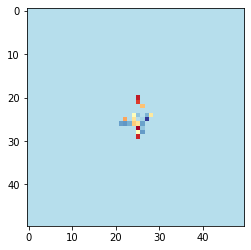

In [ ]:
sample = nor_maps[5][:,:,0]
plt.imshow(sample, cmap = 'RdYlBu_r')

In [ ]:
nor_maps_1 = np.save('/content/drive/MyDrive/KIN_TRAINING_DATASETS/nor_maps_unlabelled.npy', nor_maps)
nor_catid_1 = np.save('/content/drive/MyDrive/KIN_TRAINING_DATASETS/nor_catid_unlabelled.npy', nor_catid)

In [ ]:
nor_maps_2 = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/nor_maps_unlabelled.npy')
nor_catid_2 = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/nor_catid_unlabelled.npy')

In [ ]:
nor_catid_2

array(['6821', '8490', '8865', '16382', '22178', '31725', '39594',
       '47245', '47535', '49204', '49840', '54848', '55245', '55287',
       '65278', '69462', '70719', '70777', '78425', '79712', '79810',
       '85239', '85418', '93885', '99326', '99410', '136594', '136866',
       '137841', '137847', '138094', '138291', '143499', '144197',
       '144236', '144243', '144491', '176969', '178210', '178865',
       '179566', '179665', '183932', '184281', '184354', '184718',
       '185298', '185376', '185532', '185569', '186467', '204836',
       '205085', '208612', '208781', '209414', '210070', '210567',
       '210808', '218717', '220126', '220355', '220750', '220751',
       '221052', '221369', '227134', '227168', '227290', '228575',
       '229369', '230719', '230774', '230796', '230813', '230829',
       '238080', '271610', '273256', '273976', '278074', '278684',
       '278702', '279160', '288777', '288801', '288989', '289085',
       '289109', '289200', '289217', '290396', '297

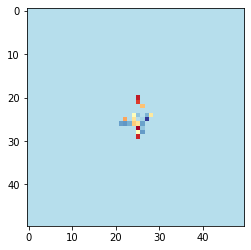

In [ ]:
sample = nor_maps_2[5][:,:,0]
plt.imshow(sample, cmap = 'RdYlBu_r')

In [ ]:
nor_catid_2[-50:-1]

array(['509670', '511789', '513066', '534763', '534793', '535007',
       '535974', '536363', '536626', '536784', '537226', '543536',
       '550431', '559574', '559584', '567676', '567682', '567750',
       '570233', '570364', '574313', '575579', '575623', '583716',
       '583744', '585694', '586330', '592542', '594364', '594785',
       '594964', '594967', '598911', '599134', '610700', '611002',
       '620098', '622982', '9008500236', '9011900216', '9011900264',
       '9011900348', '9011900735', '9016800002', '9044200107',
       '9239900038', '9239900126', '9239900138', '9388000364'],
      dtype='<U10')

In [ ]:
potential_NORs = ['8865', '55245', '69462', '79810', '85418', '137841', '228575', '230719','230796', '346718', '422406', '534763', '585694', '9011900216', '9016800002', '9239900138']